<b><font color= maroon size =3> Lead Scoring - Case Study
<b><font color= maroon size =3> Problem Statement: 

X Education needs help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model in which we need to assign a lead score to each of the leads. The goal is for customers with higher lead scores to have a higher chance of conversion, and for customers with lower lead scores to have a lower chance of conversion. The CEO has specified a target lead conversion rate of around 80%.
    
<b><font color= maroon size =3> Goals of Case Study: 

Build a logistic regression model to assign a lead score between 0 and 100 to each lead. This score can be used by the company to target potential leads. A higher score would indicate that the lead is hot and most likely to convert, whereas a lower score would indicate that the lead is cold and less likely to get converted.

## Step 1: Importing import packages and libraries for Reading Data

In [1]:
# Importing all required packages
import pandas as pd
import numpy as np
from datetime import datetime as dt

import math

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# To Scale our data
from sklearn.preprocessing import scale

# For Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#from sklearn.datasets import fetch_mldata
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn import metrics
#from sklearn.model_selection import train_test_split

## Step 2: Inspecting the Dataframe 

In [2]:
leads_data = pd.read_csv("Leads.csv", sep = ',',encoding = "ISO-8859-1")

In [3]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [5]:
leads_data.shape

(9240, 37)

In [6]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 


## Step 3: Data preparation

### Handling Duplicate rows
**INSIGHTS** : Since the Prospect ID is CUSTOMER ID, it should be unique.
#### In the following we are checking if there are any duplicate ID in the Prospect ID

In [8]:
duplicate_prosepect_id = leads_data.duplicated(subset = "Prospect ID")

# Correcting the typo in the print statement
print(sum(duplicate_prosepect_id) == 0)


True


**INSIGHTS** : There are no duplicates under Prospect ID

In [9]:
# Checking if we have duplicates under 'Lead Number'
duplicate_LeadNo = leads_data.duplicated(subset='Lead Number')

# Sum the boolean Series to count duplicates and check if it's zero
no_duplicates = sum(duplicate_LeadNo) == 0

# Print the result
print(no_duplicates)


True


**INSIGHTS** : There are no duplicates under the LeadNumber
    This suggests that both the columns are the same variables that define the same customer that has been contacted.
    Since these are not providimg further insights, it is appropriate to drop those two variables for our further analysis.
    

In [10]:
#Dropping the vestigial columns Prospect ID and Lead ID from teh dataset:
leads_data.drop(['Prospect ID'], axis =1, inplace = True)

In [11]:
#Checking data again for further confirmation:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [12]:
#Converting 'Select' values to NaN:
leads_data = leads_data.replace('Select',np.nan )

In [13]:
leads_data.nunique()

Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [14]:
# Dropping columns with unique values
columns_to_drop = ['Magazine', 
                   'Receive More Updates About Our Courses', 
                   'I agree to pay the amount through cheque', 
                   'Get updates on DM Content', 
                   'Update me on Supply Chain Content']

leads_data = leads_data.drop(columns_to_drop, axis=1)
leads_data.shape

(9240, 31)

In [15]:
# Deleting the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' 
# as they will be represented by their corresponding index columns
leads_data = leads_data.drop('Asymmetrique Activity Score', axis=1)
leads_data = leads_data.drop('Asymmetrique Profile Score', axis=1)
leads_data.shape

(9240, 29)

In [16]:
# Deleting the columns 'What matters most to you in choosing a course' as it majorly has unique values and some null values.
leads_data = leads_data.drop('What matters most to you in choosing a course', axis=1)
leads_data.shape

(9240, 28)

In [17]:
# Deleting the columns 'How did you hear about X Education' as it mostly has null values or 'Select' values 
# that contribute to the 'Converted' percentage.
leads_data = leads_data.drop('How did you hear about X Education', axis=1)
leads_data.shape

(9240, 27)

### removing rows of a particular column where there is a percentage of high missing values

In [18]:
leads_data['Lead Source'].isnull().sum()

36

In [19]:
# removing rows because the column cannot be removed because of its necessity /importance
leads_data = leads_data[~pd.isnull(leads_data['Lead Source'])]
leads_data.shape

(9204, 27)

### Imputing with Median values because the continuous variables have outliers

In [20]:
leads_data['TotalVisits'].replace(np.NaN, leads_data['TotalVisits'].median(), inplace =True)

In [21]:
leads_data['Page Views Per Visit'].replace(np.NaN, leads_data['Page Views Per Visit'].median(), inplace =True)

### Imputing with Mode values

In [22]:
leads_data['Country'].mode()

0    India
Name: Country, dtype: object

In [23]:
leads_data.loc[pd.isnull(leads_data['Country']), ['Country']] = 'India'

In [24]:
leads_data['Country'] = leads_data['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads_data['Country'].value_counts()

Country
India            8917
Outside India     287
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Country'>

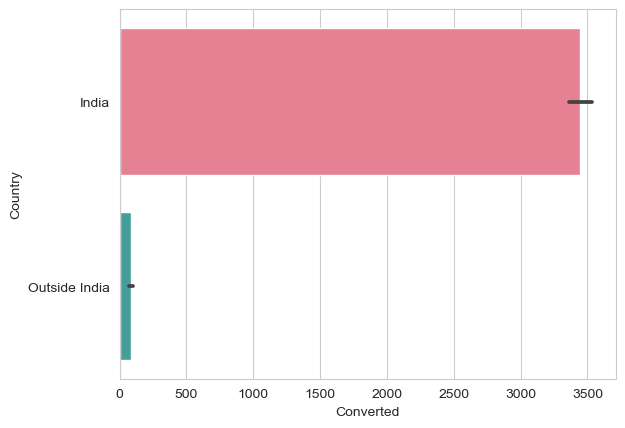

In [25]:
sns.barplot(y='Country', x='Converted', palette='husl', data=leads_data, estimator=np.sum)

#### Assigning a Unique Category to NULL/SELECT Values
#### Instead of deleting columns with a high null value percentage (which results in data loss), this strategy adds more information to the dataset and changes the variance.
#### Creating a new category consisting of NULL/Select values for the Lead Quality field.

#### 'Select' values in some columns:
#### Some columns in the dataset contain a level/value called 'Select'. This may have occurred because these fields on the website are non-mandatory with drop-down options for customers to choose from. Among the dropdown values, the default option is likely 'Select' and since these fields are not mandatory, many customers may have chosen to leave it as the default value 'Select'.

In [26]:
leads_data['Lead Quality'].value_counts()

Lead Quality
Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [27]:
leads_data['Lead Quality'].isnull().sum()

4753

In [28]:
leads_data['Lead Quality'].fillna("Unknown", inplace = True)
leads_data['Lead Quality'].value_counts()

Lead Quality
Unknown              4753
Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Lead Quality'>

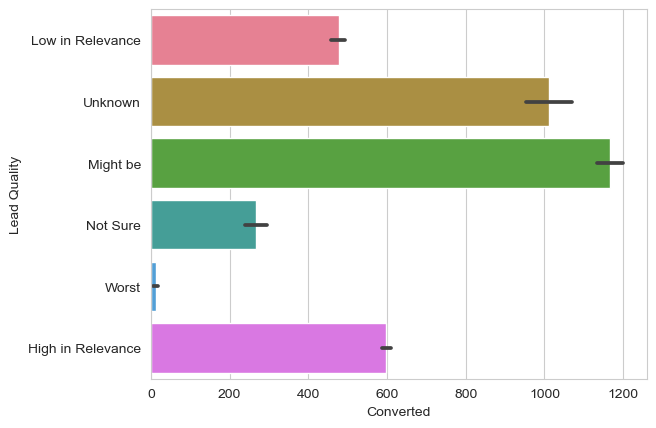

In [29]:
sns.barplot(y='Lead Quality', x='Converted', palette='husl', data=leads_data, estimator=np.sum)

#### Creating a new category consisting on NULL/Select values for the field Asymmetrique Profile Index

In [30]:
leads_data['Asymmetrique Profile Index'].value_counts()

Asymmetrique Profile Index
02.Medium    2771
01.High      2201
03.Low         31
Name: count, dtype: int64

In [31]:
leads_data['Asymmetrique Profile Index'].isnull().sum()

4201

In [32]:
leads_data['Asymmetrique Profile Index'].fillna("Unknown", inplace = True)
leads_data['Asymmetrique Profile Index'].value_counts()

Asymmetrique Profile Index
Unknown      4201
02.Medium    2771
01.High      2201
03.Low         31
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Asymmetrique Profile Index'>

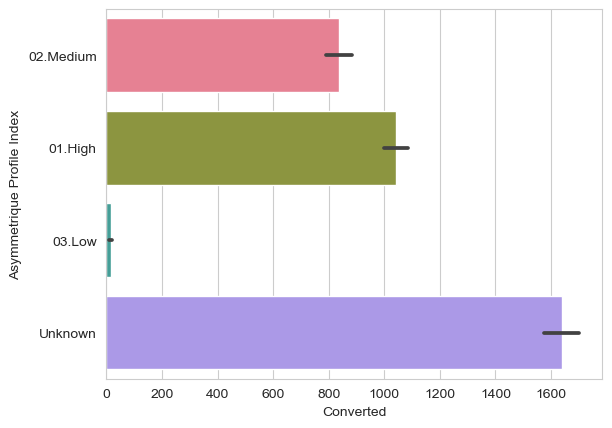

In [33]:
sns.barplot(y='Asymmetrique Profile Index', x='Converted', palette='husl', data=leads_data, estimator=np.sum)

#### Creating a new category consisting on NULL/Select values for the field Asymmetrique Activity Index

In [34]:
leads_data['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
02.Medium    3820
01.High       821
03.Low        362
Name: count, dtype: int64

In [35]:
leads_data['Asymmetrique Activity Index'].isnull().sum()

4201

In [36]:
leads_data['Asymmetrique Activity Index'].fillna("Unknown", inplace = True)
leads_data['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
Unknown      4201
02.Medium    3820
01.High       821
03.Low        362
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Asymmetrique Activity Index'>

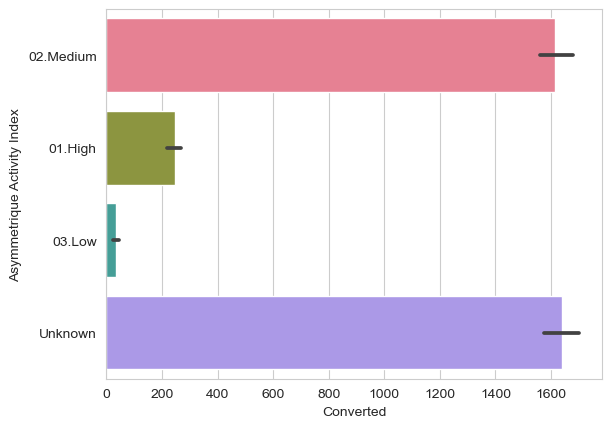

In [37]:
sns.barplot(y='Asymmetrique Activity Index', x='Converted', palette='husl', data=leads_data, estimator=np.sum)

#### Creating a new category consisting on NULL/Select values for the field City

In [38]:
leads_data['City'].isnull().sum()

3638

In [39]:
leads_data['City'].fillna("Unknown", inplace = True)
leads_data['City'].value_counts()

City
Unknown                        3638
Mumbai                         3220
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: count, dtype: int64

In [40]:
leads_data['City'].replace('Select', 'Unknown', inplace =True)
leads_data['City'].value_counts()

City
Unknown                        3638
Mumbai                         3220
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='City'>

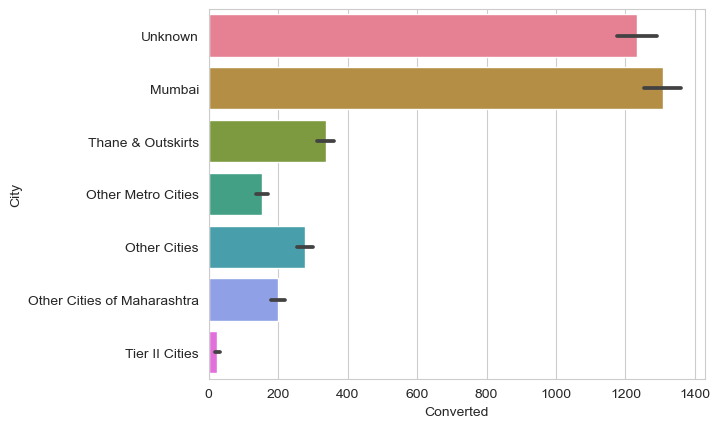

In [41]:
sns.barplot(y='City', x='Converted', palette='husl', data=leads_data, estimator=np.sum)

#### Creating a new category consisting on NULL/Select values for the field Last Activity

In [42]:
leads_data['Last Activity'].value_counts()

Last Activity
Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [43]:
leads_data['Last Activity'].isnull().sum()

101

In [44]:
leads_data['Last Activity'].fillna("Unknown", inplace = True)
leads_data['Last Activity'].value_counts()

Last Activity
Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          101
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Last Activity'>

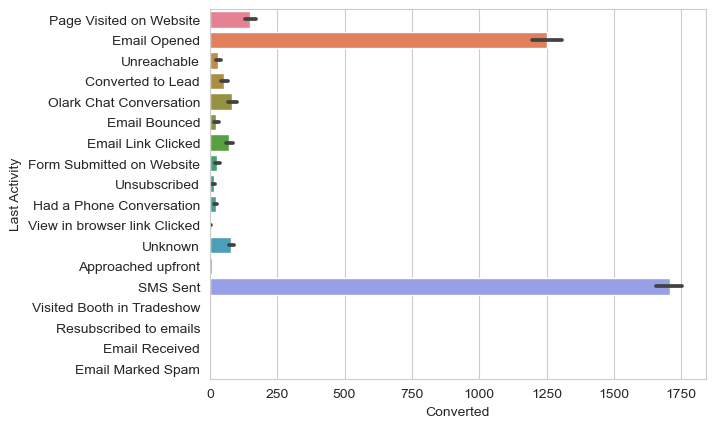

In [45]:
sns.barplot(y='Last Activity', x='Converted', palette='husl', data=leads_data, estimator=np.sum)

#### Creating a new category consisting on NULL/Select values for the field Lead Profile

In [46]:
leads_data['Lead Profile'].value_counts()

Lead Profile
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [47]:
leads_data['Lead Profile'].isnull().sum()

6824

In [48]:
leads_data['Lead Profile'].fillna("Unknown", inplace = True)
leads_data['Lead Profile'].value_counts()

Lead Profile
Unknown                        6824
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Lead Profile'>

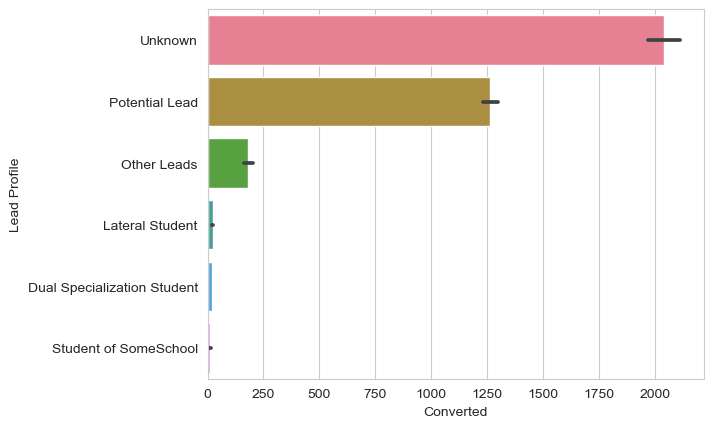

In [49]:
sns.barplot(y='Lead Profile', x='Converted', palette='husl', data=leads_data, estimator=np.sum)

#### Creating a new category consisting on NULL/Select values for the field What is your current occupation

In [50]:
leads_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5567
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [51]:
leads_data['What is your current occupation'].isnull().sum()

2690

In [52]:
leads_data['What is your current occupation'].fillna("Unknown", inplace = True)
leads_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5567
Unknown                 2690
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='What is your current occupation'>

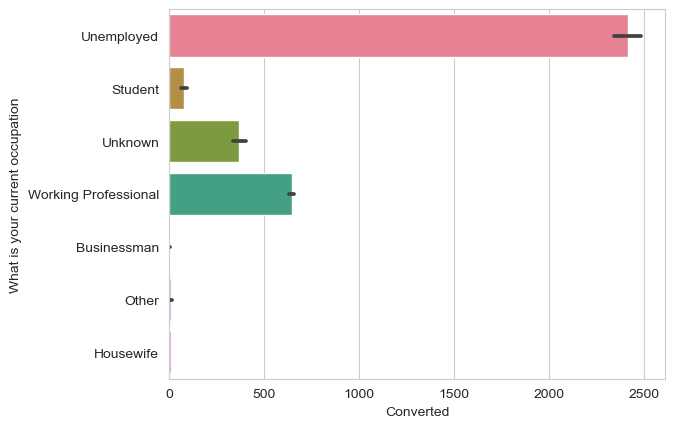

In [53]:
sns.barplot(y='What is your current occupation', x='Converted', palette='husl', data=leads_data, estimator=np.sum)

#### Creating a new category consisting on NULL/Select values for the field Specialization

In [54]:
leads_data['Specialization'].value_counts()

Specialization
Finance Management                   973
Human Resource Management            847
Marketing Management                 837
Operations Management                502
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                158
Hospitality Management               114
E-COMMERCE                           111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [55]:
leads_data['Specialization'].isnull().sum()

3352

In [56]:
leads_data['Specialization'].fillna("Unknown", inplace = True)
leads_data['Specialization'].value_counts()

Specialization
Unknown                              3352
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Specialization'>

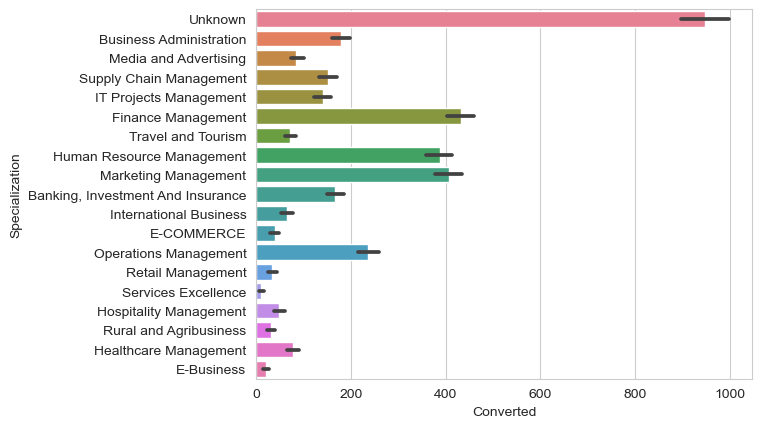

In [57]:
sns.barplot(y='Specialization', x='Converted', palette='husl', data=leads_data, estimator=np.sum)

#### Creating a new category consisting on NULL/Select values for the field Tags

In [58]:
leads_data['Tags'].value_counts()

Tags
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to O

In [59]:
leads_data['Tags'].isnull().sum()

3342

In [60]:
leads_data['Tags'].fillna("Unknown", inplace = True)
leads_data['Tags'].value_counts()

Tags
Unknown                                              3342
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch 

<Axes: xlabel='Converted', ylabel='Tags'>

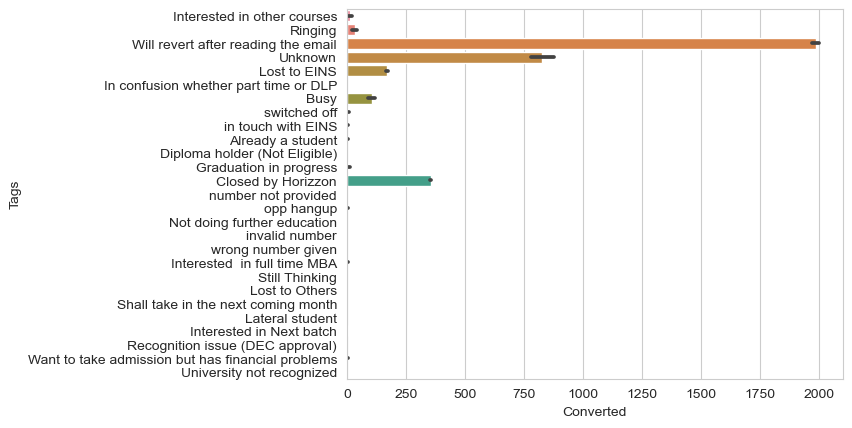

In [61]:
sns.barplot(y='Tags', x='Converted', palette='husl', data=leads_data, estimator=np.sum)

In [62]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads_data.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_data.isnull().sum()/leads_data.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Number,0,0.0
Newspaper Article,0,0.0
A free copy of Mastering The Interview,0,0.0
Asymmetrique Profile Index,0,0.0
Asymmetrique Activity Index,0,0.0
City,0,0.0
Lead Profile,0,0.0
Lead Quality,0,0.0
Tags,0,0.0
Through Recommendations,0,0.0


In [63]:
leads_data.shape

(9204, 27)

### Categorical Data Visualization

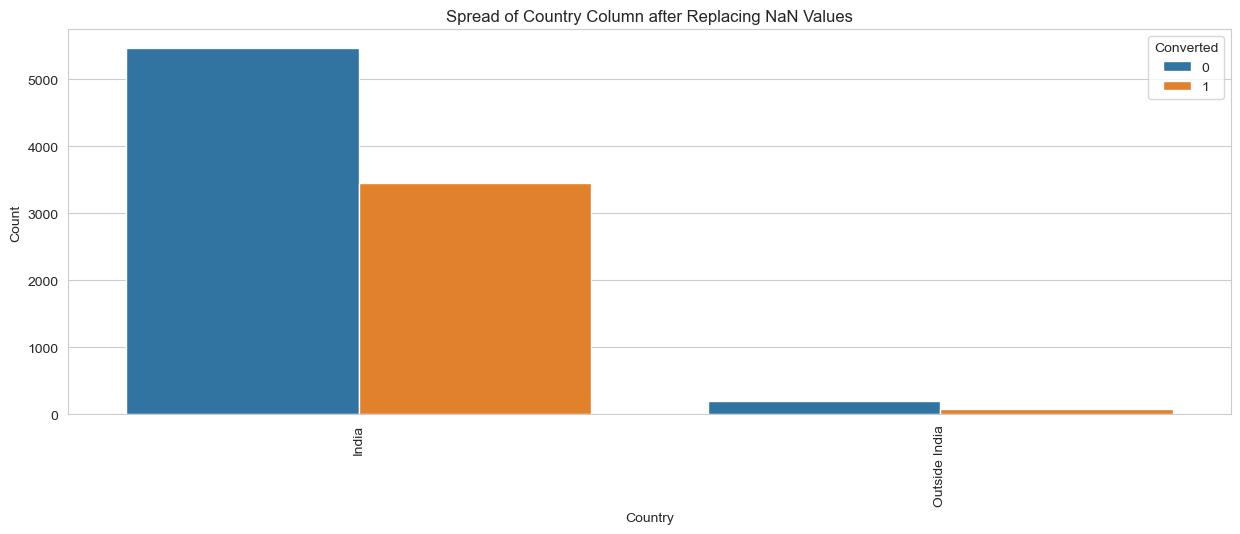

In [64]:
plt.figure(figsize=(15, 5))
country_plot = sns.countplot(x=leads_data['Country'], hue=leads_data['Converted'].astype(str))
country_plot.set_xticklabels(country_plot.get_xticklabels(), rotation=90)
plt.title('Spread of Country Column after Replacing NaN Values')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Converted')
plt.show()

- Given that the vast majority of entries (~97%) in the 'Country' column are for India, it can be safely removed.

In [65]:
#creating a list of columns to be droppped

columns_to_drop=['Country']

In [66]:
city_value_counts = leads_data['City'].value_counts(dropna=False)


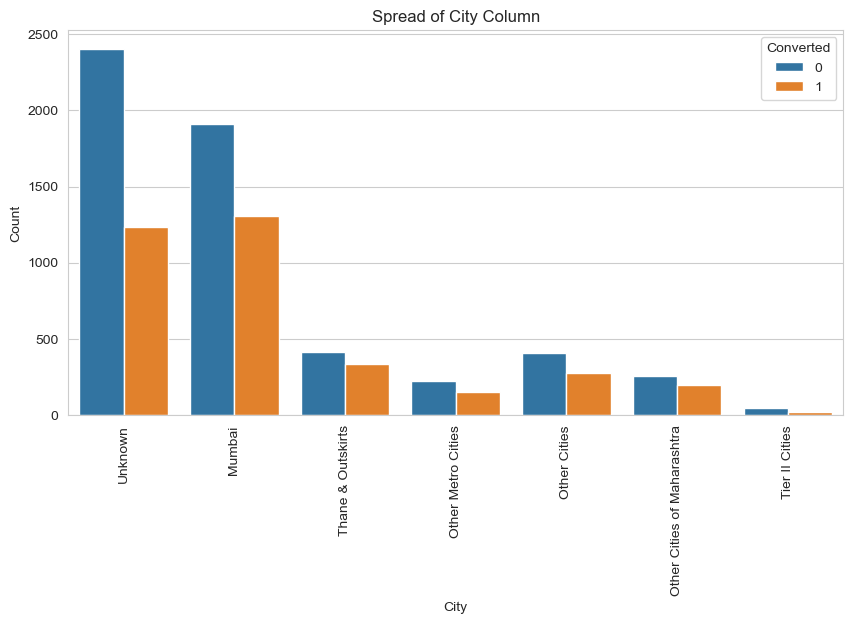

In [67]:
plt.figure(figsize=(10, 5))
city_plot = sns.countplot(x=leads_data['City'], hue=leads_data['Converted'].astype(str))
city_plot.set_xticklabels(city_plot.get_xticklabels(), rotation=90)
plt.title('Spread of City Column')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Converted')
plt.show()


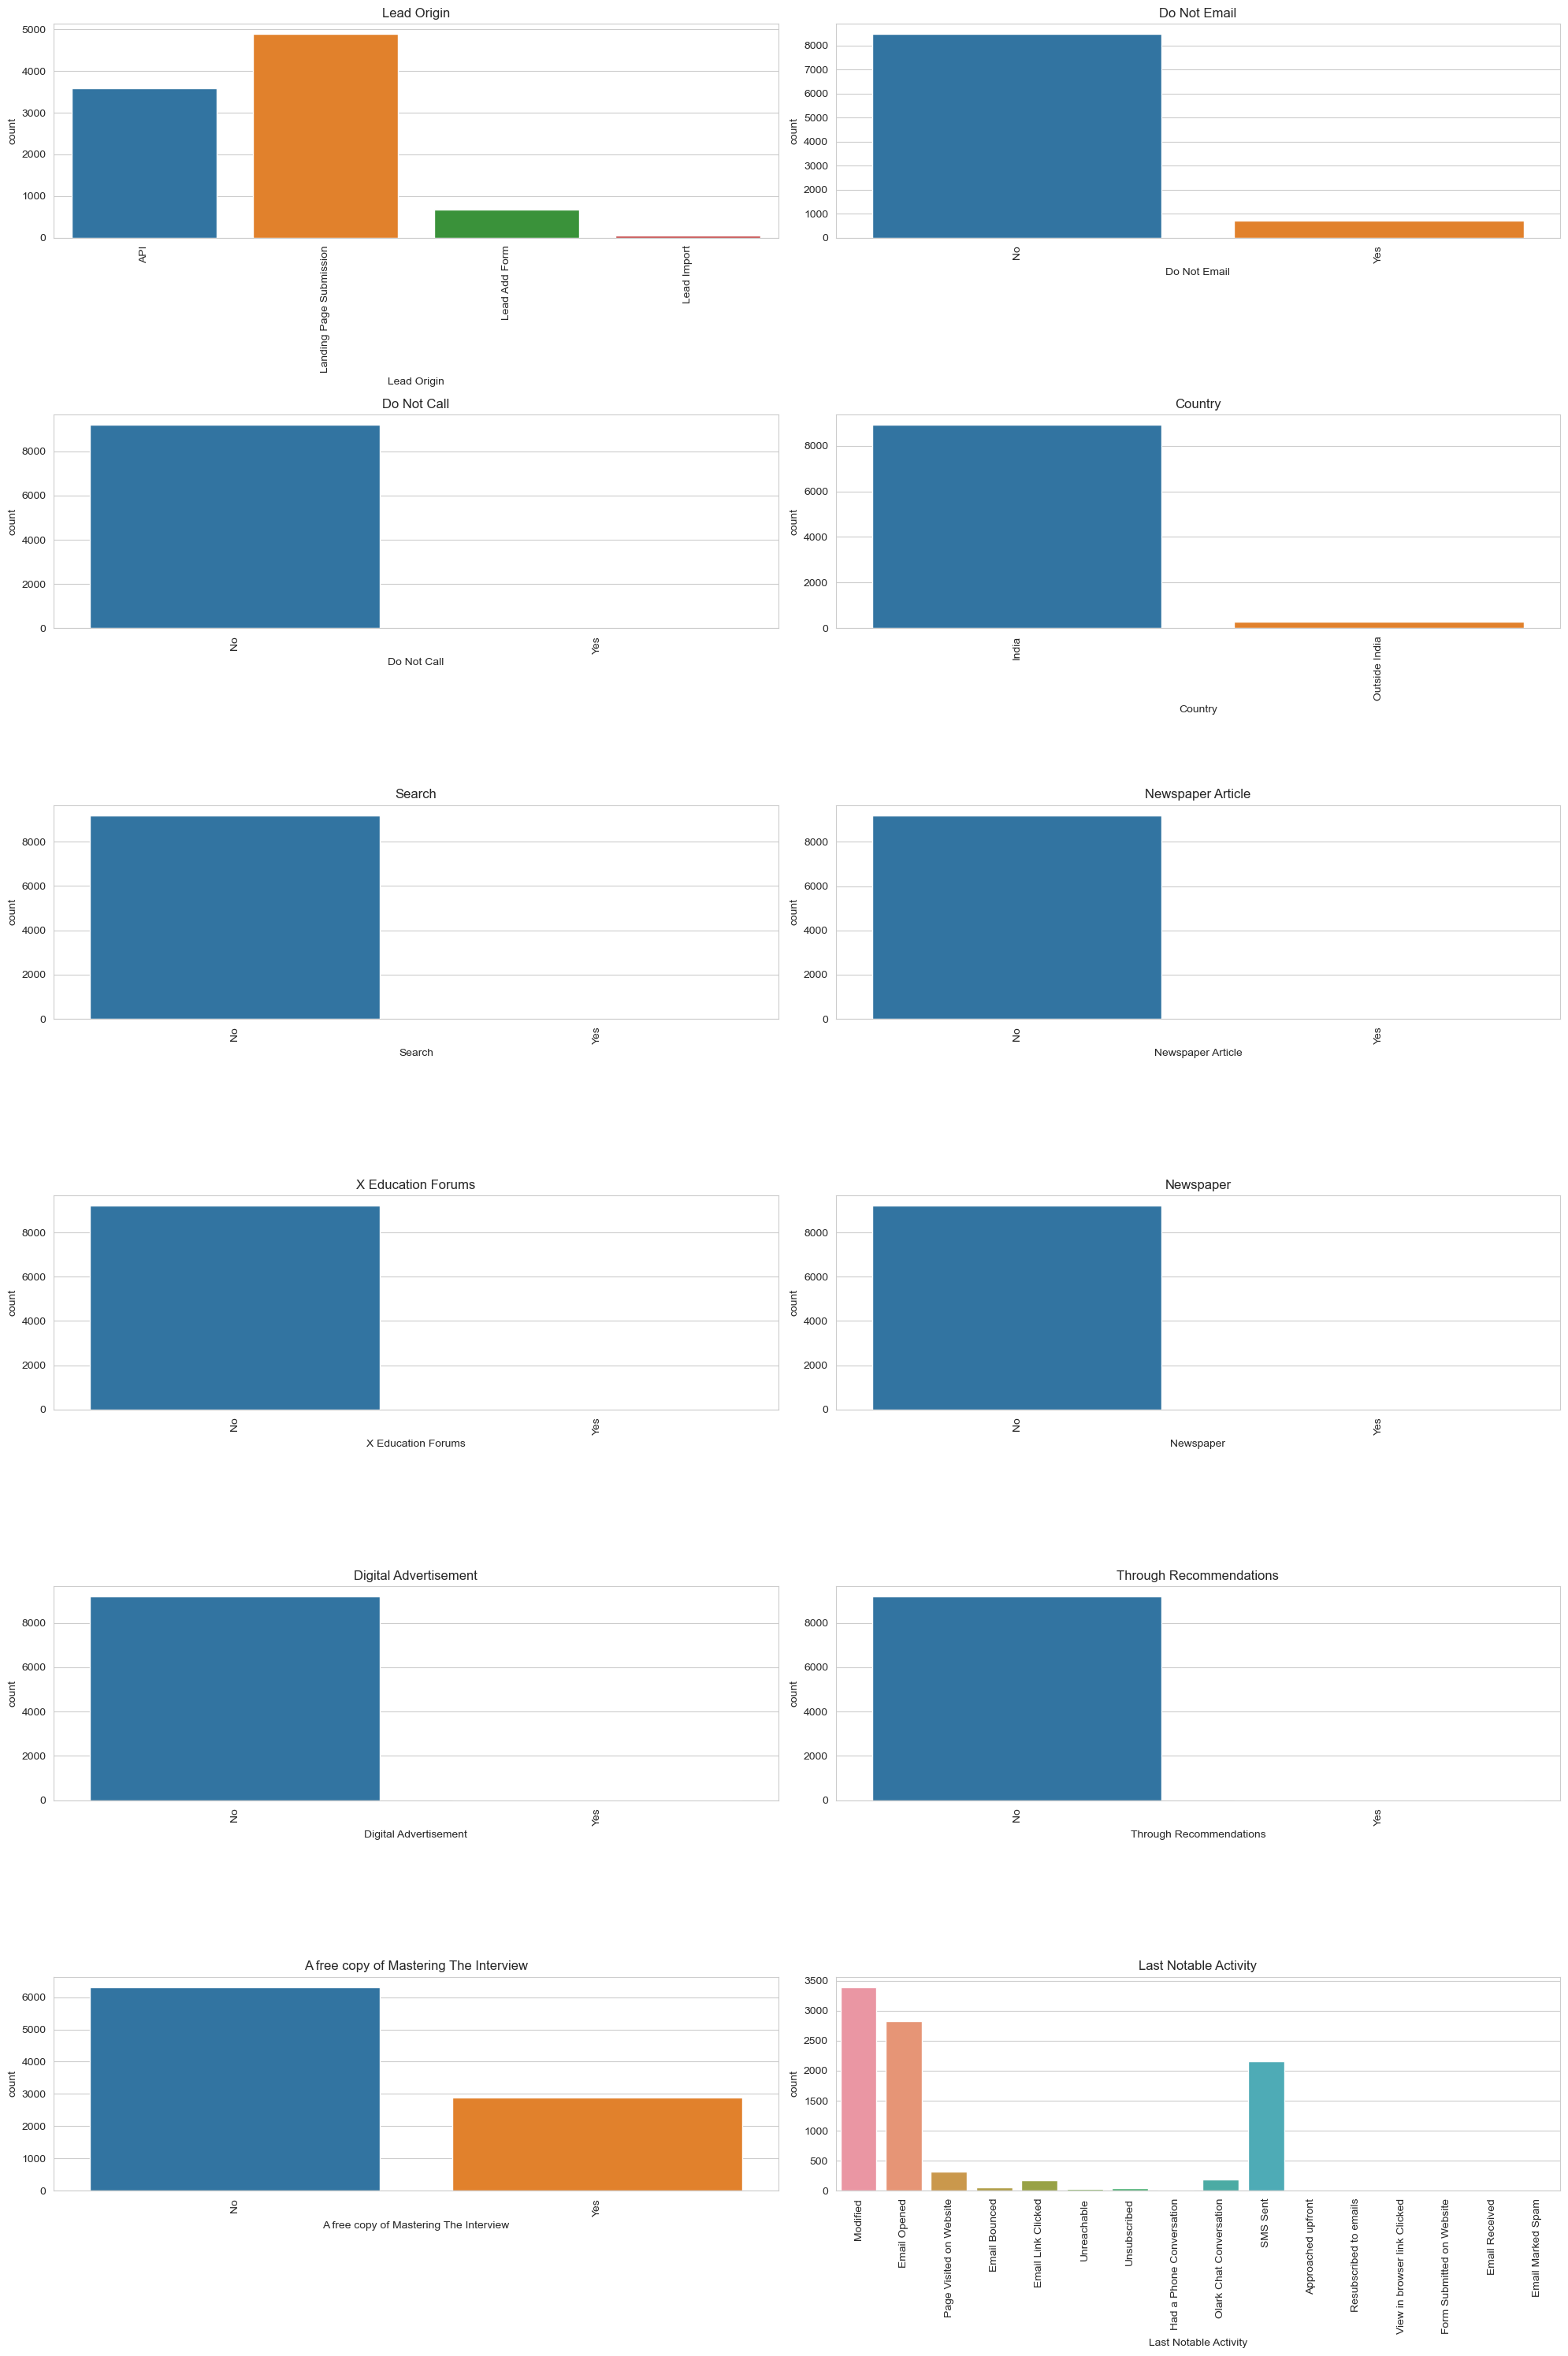

In [68]:
plt.figure(figsize=(20, 30))

columns = ['Lead Origin', 'Do Not Email', 'Do Not Call', 'Country', 'Search', 
           'Newspaper Article', 'X Education Forums', 'Newspaper', 
           'Digital Advertisement', 'Through Recommendations', 
           'A free copy of Mastering The Interview', 'Last Notable Activity']

for i, column in enumerate(columns, 1):
    plt.subplot(6, 2, i)
    sns.countplot(x=leads_data[column])
    plt.title(column)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()




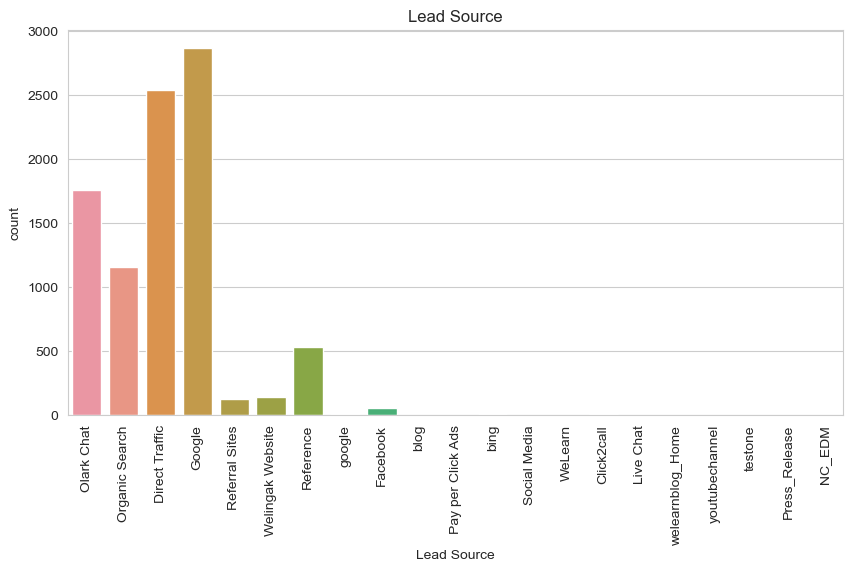

In [69]:
plt.figure(figsize=(10, 5))
sns.countplot(x=leads_data['Lead Source'])
plt.title('Lead Source')
plt.xticks(rotation=90)
plt.show()


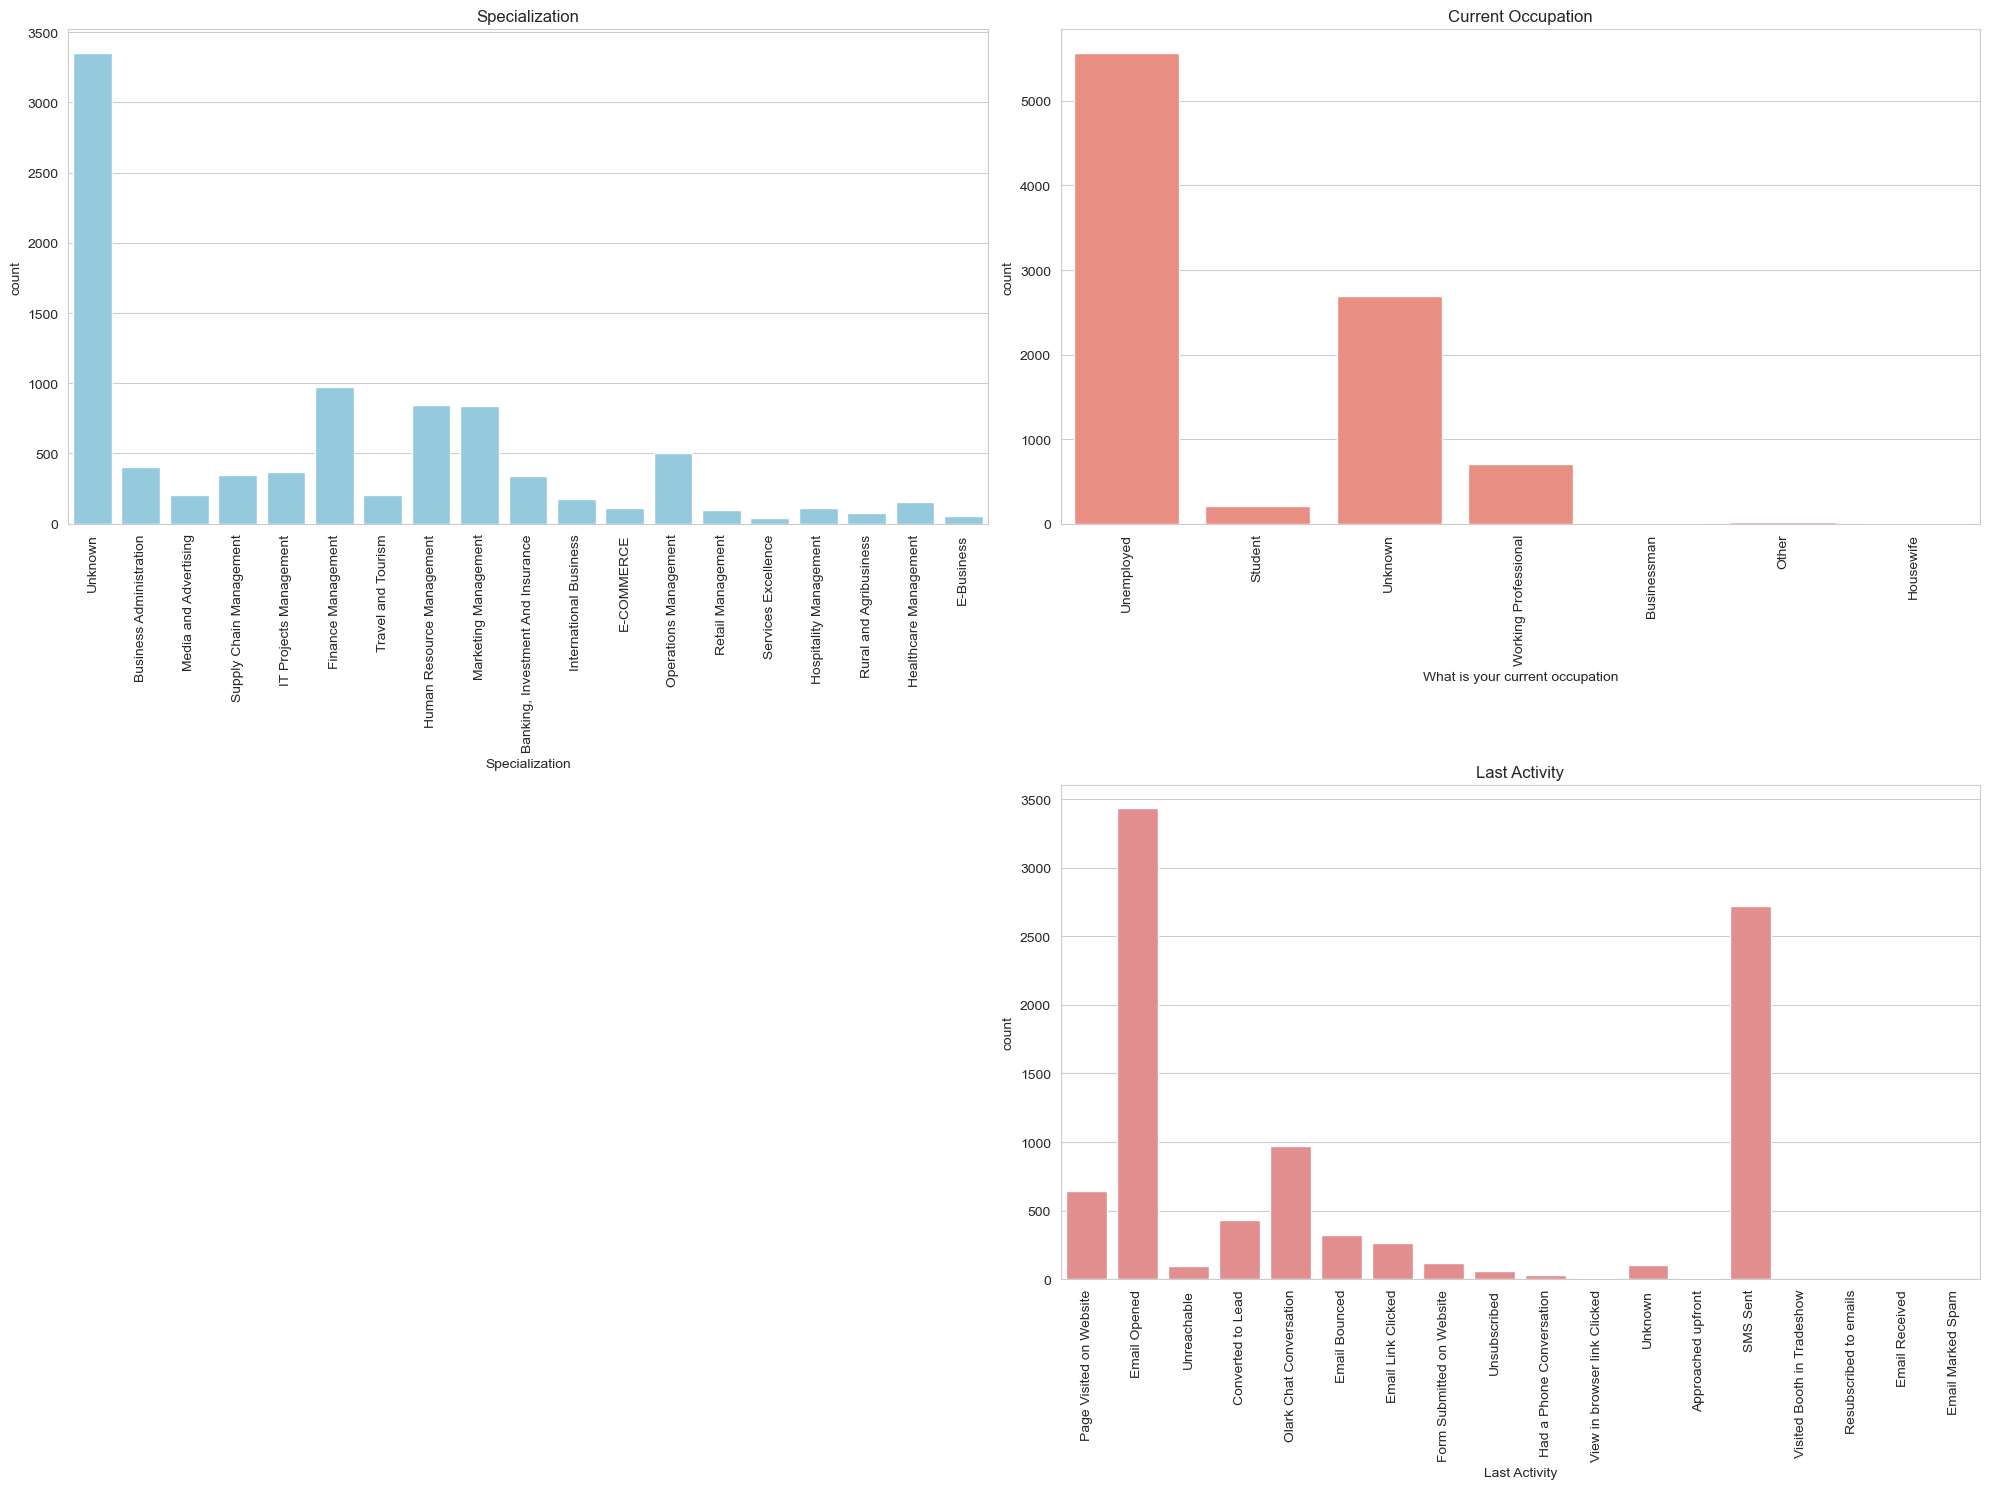

In [70]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.countplot(x=leads_data['Specialization'], color='skyblue')
plt.title('Specialization')
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
sns.countplot(x=leads_data['What is your current occupation'], color='salmon')
plt.title('Current Occupation')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
sns.countplot(x=leads_data['Last Activity'], color='lightcoral')
plt.title('Last Activity')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


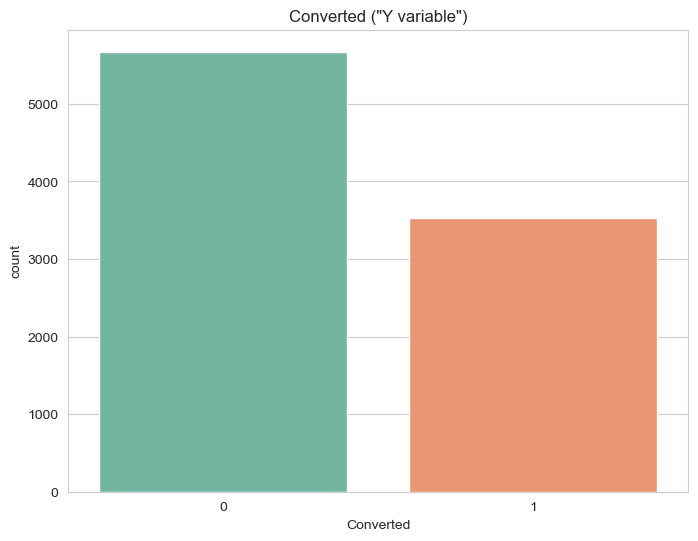

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(x=leads_data['Converted'], palette='Set2')
plt.title('Converted ("Y variable")')
plt.show()


### Checking for Outliers

In [72]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
leads_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000
mean,617194.608648,0.383746,3.449587,489.005541,2.364923
std,23418.830233,0.486324,4.824662,547.980340,2.145999
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,14.000000,1.000000
50%,615479.000000,0.000000,3.000000,250.000000,2.000000
75%,637409.250000,1.000000,5.000000,938.000000,3.000000
90%,650513.100000,1.000000,7.000000,1380.000000,5.000000
95%,655405.850000,1.000000,10.000000,1562.000000,6.000000
99%,659599.460000,1.000000,17.000000,1839.970000,9.000000


In [73]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(numeric_variables)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


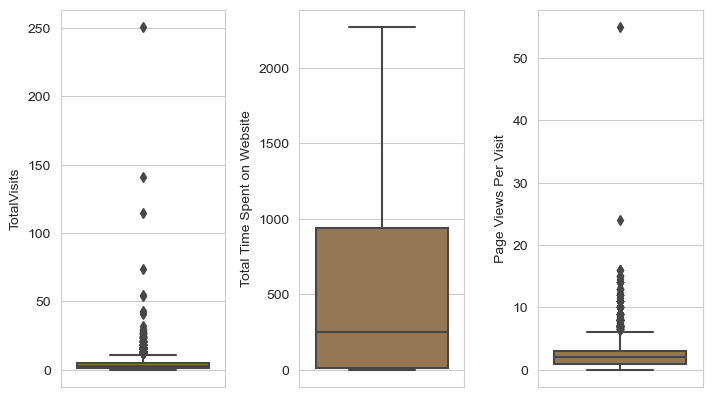

In [74]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Function to plot the distribution plot of the numeric variable list
def boxplot(attr_list):
    plt.figure(figsize=(12,8))
    for attr in attr_list:
        plt.subplot(2,5,attr_list.index(attr)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=attr,palette='cubehelix', data=leads_data)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)    

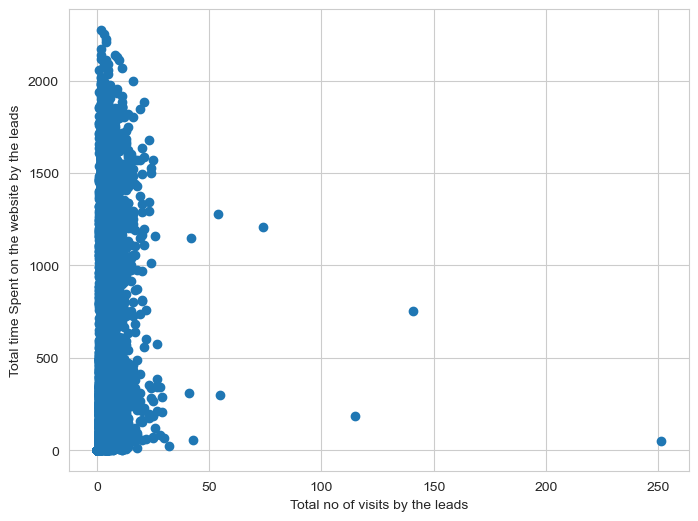

In [75]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leads_data['TotalVisits'], leads_data['Total Time Spent on Website'])
ax.set_xlabel('Total no of visits by the leads')
ax.set_ylabel('Total time Spent on the website by the leads')
plt.show()

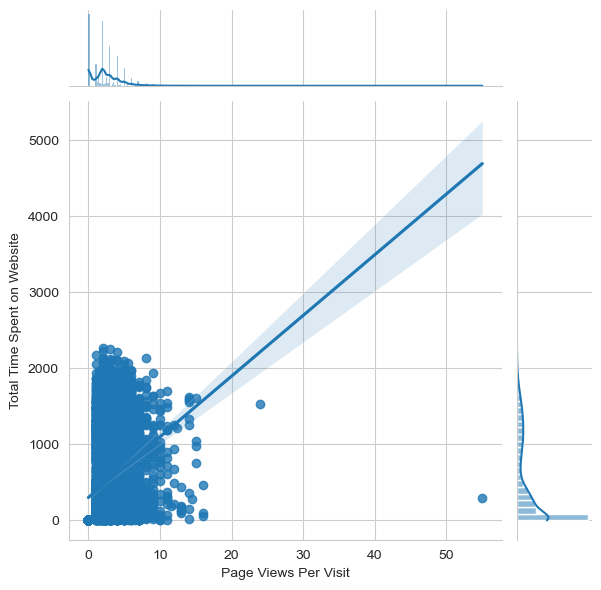

In [76]:
sns.jointplot(data= leads_data,x= 'Page Views Per Visit',y = 'Total Time Spent on Website',kind="reg")
plt.show()

### Removing outlier values based on the Interquartile distance for some of the continuous variable

In [77]:
Q1 = leads_data['TotalVisits'].quantile(0.25)
Q3 = leads_data['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads_data=leads_data.loc[(leads_data['TotalVisits'] >= Q1 - 1.5*IQR) & (leads_data['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = leads_data['Page Views Per Visit'].quantile(0.25)
Q3 = leads_data['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads_data=leads_data.loc[(leads_data['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads_data['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads_data.shape

(8575, 27)

#### After removing the outlier

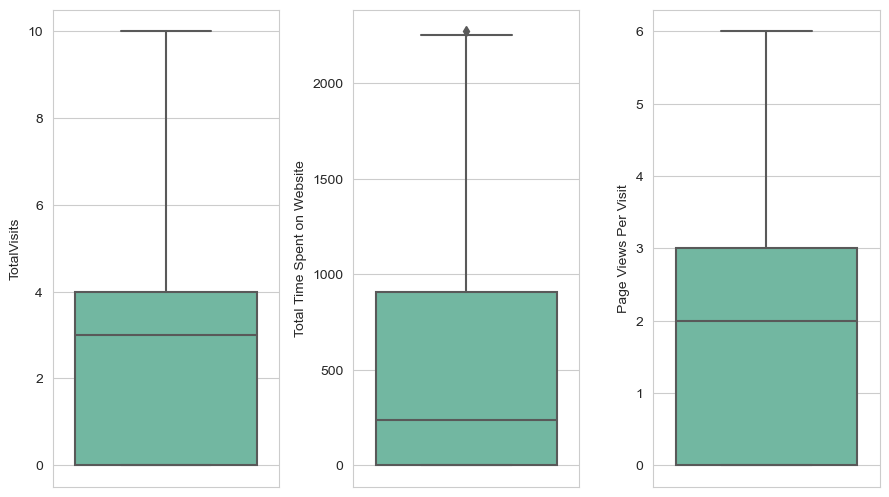

In [78]:
#Function to plot the distribution plot of the numeric variable list
def boxplot(attr_list):
    plt.figure(figsize=(15,10))
    for attr in attr_list:
        plt.subplot(2,5,attr_list.index(attr)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=attr,palette='BuGn_r', data=leads_data)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)  

### Converting variables(Yes/No) to binary values 0/1

In [79]:
# List of variables to map

attrlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def map_binary(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
leads_data[attrlist] = leads_data[attrlist].apply(map_binary)
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,Interested in other courses,Low in Relevance,Unknown,Unknown,02.Medium,02.Medium,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,Ringing,Unknown,Unknown,Unknown,02.Medium,02.Medium,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,Ringing,Not Sure,Unknown,Mumbai,02.Medium,01.High,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,Will revert after reading the email,Might be,Unknown,Mumbai,02.Medium,01.High,0,Modified


### For categorical variables with multiple levels, creating dummy features (one-hot encoded)

In [80]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads_data.select_dtypes(include=['object']).columns
cat_cols
#leads_data.shape

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Last Notable Activity'],
      dtype='object')

In [81]:
# Creating dummy variables for rest of the categorical variables and also 
# dropping the level called 'Unknown' which has null/select values.

# Creating dummy variables for the variable 'Lead Quality'
lr = pd.get_dummies(leads_data['Lead Quality'], prefix='Lead Quality')
# Dropping the level called 'Unknown' which represents null/select values
lr1 = lr.drop(['Lead Quality_Unknown'], axis = 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lr1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Asymmetrique Profile Index'
lr = pd.get_dummies(leads_data['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
# Dropping the level called 'Unknown' which represents null/select values
lr1 = lr.drop(['Asymmetrique Profile Index_Unknown'], axis = 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lr1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Asymmetrique Activity Index'
lr = pd.get_dummies(leads_data['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index')
# Dropping the level called 'Unknown' which represents null/select values
lr1 = lr.drop(['Asymmetrique Activity Index_Unknown'], axis = 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lr1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Tags'
lr = pd.get_dummies(leads_data['Tags'], prefix='Tags')
# Dropping the level called 'Unknown' which represents null/select values
lr1 = lr.drop(['Tags_Unknown'], axis = 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lr1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Lead Profile'
lr = pd.get_dummies(leads_data['Lead Profile'], prefix='Lead Profile')
# Dropping the level called 'Unknown' which represents null/select values
lr1 = lr.drop(['Lead Profile_Unknown'], axis = 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lr1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'What is your current occupation'
lr = pd.get_dummies(leads_data['What is your current occupation'], prefix='What is your current occupation')
# Dropping the level called 'Unknown' which represents null/select values
lr1 = lr.drop(['What is your current occupation_Unknown'], axis = 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lr1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Specialization'
lr = pd.get_dummies(leads_data['Specialization'], prefix='Specialization')
# Dropping the level called 'Unknown' which represents null/select values
lr1 = lr.drop(['Specialization_Unknown'], axis = 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lr1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'City'
lr = pd.get_dummies(leads_data['City'], prefix='City')
# Dropping the level called 'Unknown' which represents null/select values
lr1 = lr.drop(['City_Unknown'], axis = 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lr1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Last Activity'
lr = pd.get_dummies(leads_data['Last Activity'], prefix='Last Activity')
# Dropping the level called 'Unknown' which represents null/select values
lr1 = lr.drop(['Last Activity_Unknown'], axis = 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lr1], axis=1)
#--------------------------------------------------------------------------------------
leads_data.shape

(8575, 116)

#### Dropping the redundant variables

In [82]:
# We have already created dummies for the below variables, so we can drop them now
leads_data = leads_data.drop(['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Profile',
                    'Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 
                    'Lead Source','Last Notable Activity'], axis = 1)
leads_data.shape

(8575, 103)

In [83]:
leads_data.astype(int).head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,660737,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5,674,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2,1532,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1,305,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,0,0,1,2,1428,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Ensuring there are no categorical columns left in the dataframe
columns = leads_data.columns
num_columns = leads_data._get_numeric_data().columns
list(set(columns) - set(num_columns))

[]

In [85]:
# Creating a copy of this origial variable in case if needed later on
Org_leads_data = leads_data.copy()

In [86]:
print(Org_leads_data.shape)
print(leads_data.shape)

(8575, 103)
(8575, 103)


### Step 4: Test-Train Split

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
# Putting feature variable to X
X = leads_data.drop(['Converted','Lead Number'], axis=1)

X.astype(float).head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,5.0,674.0,2.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,1532.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,305.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,2.0,1428.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
# assigning target variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [90]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature scaling

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
#scaling of features
scaler = StandardScaler()
#X_train = X_train.select_dtypes(include=['float64', 'int64'])

#num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
8529,0,0,0.969969,-0.864724,1.785283,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
7331,0,0,0.102087,-0.215257,0.562949,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
7688,0,0,0.102087,1.523992,0.562949,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
92,0,0,0.536028,-0.686762,1.174116,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4908,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False


In [93]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,6002.000000,6002.0,6.002000e+03,6.002000e+03,6.002000e+03,6002.000000,6002.0,6002.0,6002.000000,6002.000000,6002.000000,6002.000000
mean,0.076308,0.0,1.047701e-16,6.392754e-17,2.308494e-17,0.001000,0.0,0.0,0.000167,0.000333,0.000333,0.292902
std,0.265512,0.0,1.000083e+00,1.000083e+00,1.000083e+00,0.031604,0.0,0.0,0.012908,0.018253,0.018253,0.455132
min,0.000000,0.0,-1.199737e+00,-8.720622e-01,-1.270553e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,-7.657957e-01,-8.683929e-01,-6.593854e-01,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,1.020868e-01,-4.381673e-01,-4.821826e-02,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,5.360281e-01,7.846274e-01,5.629489e-01,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000
max,1.000000,0.0,3.139676e+00,3.296264e+00,2.396450e+00,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


### Checking the Lead Conversion Rate

In [94]:
# verifying the Lead Conversion Rate
converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
converted

38.04081632653061

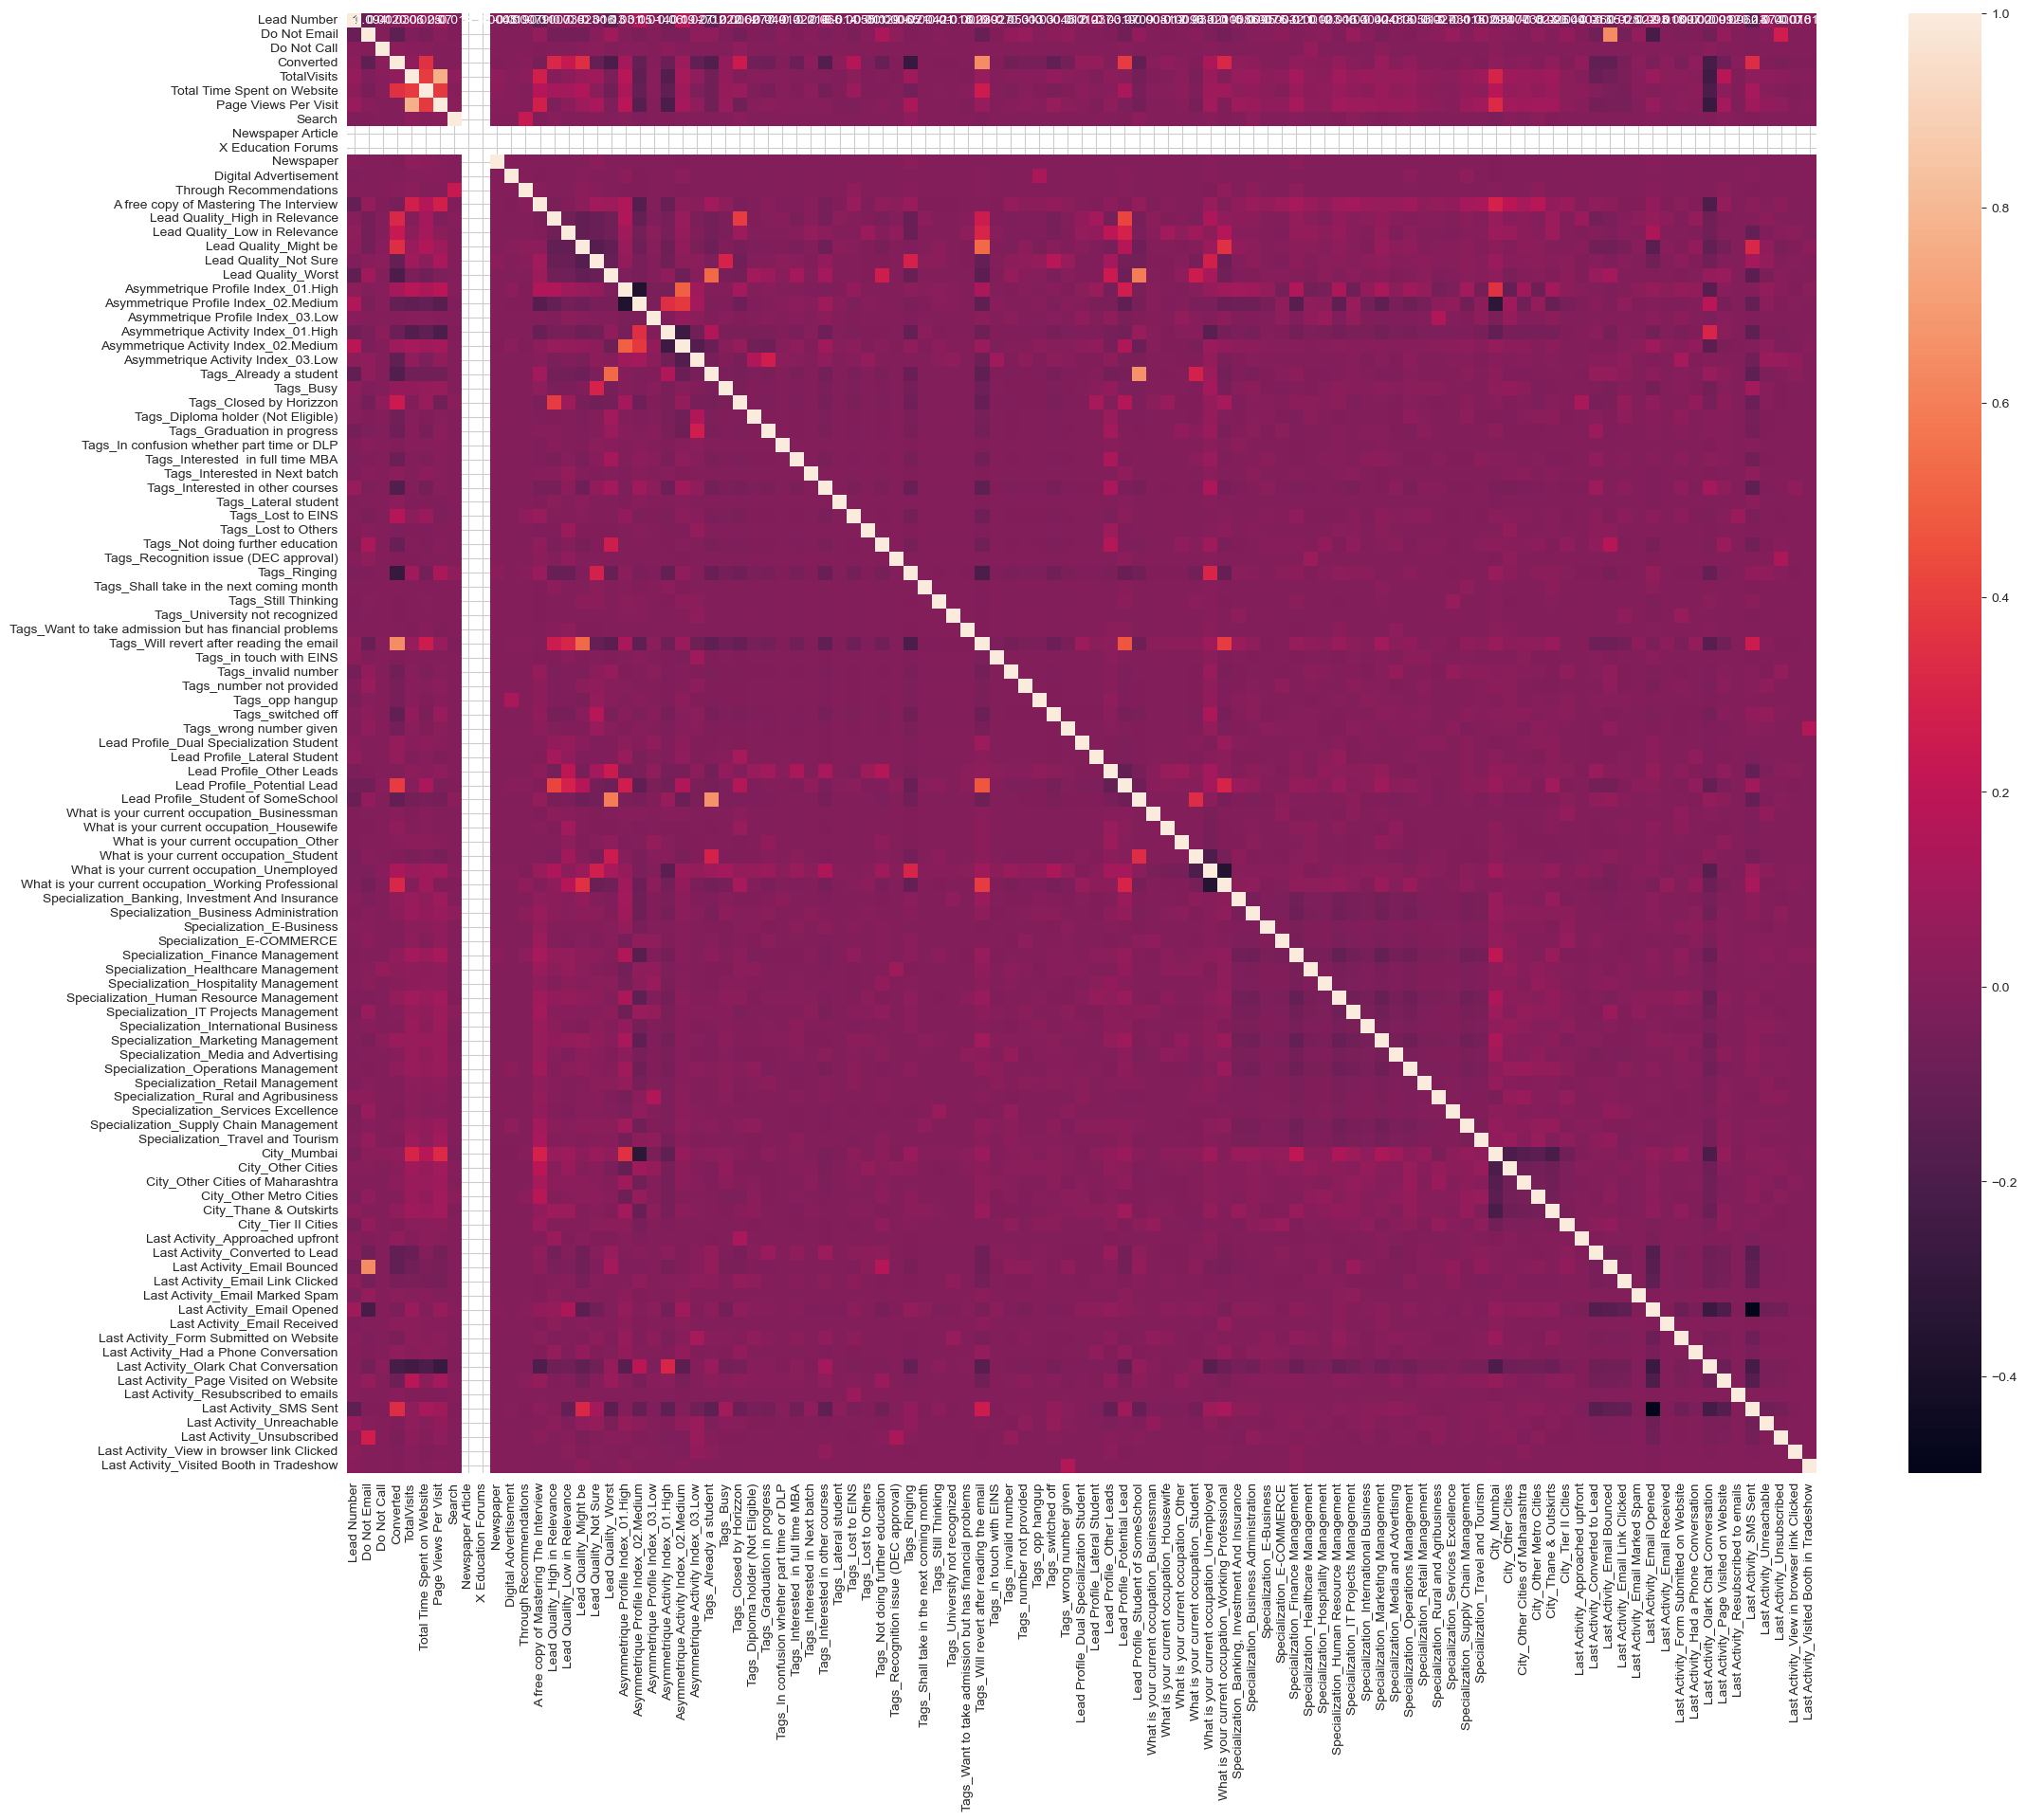

In [95]:
# Let's see the correlation matrix
plt.figure(figsize = (25,20))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

#### We have the lead conversion rate of 38%

### Step 6: Model Building

#### now lets start by splitting the data into a training set and a test set.

### First Training Model

In [96]:
import statsmodels.api as sm

In [97]:
# Logistic regression model
logrm1 = sm.GLM(y_train,(sm.add_constant(X_train).astype(float)), family = sm.families.Binomial())
logrm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5905
Model Family:                Binomial   Df Model:                           96
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 19 May 2024   Deviance:                       68157.
Time:                        16:39:37   Pearson chi2:                 3.33e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -3.879e+13   8.96e+06  -4.33e+06      0.000   -3.88e+13   -3.88e+13
Do Not Email                                           -4.016e+14   4.63e+06  -8.67e+07      0.000   -4.02e+14   -4.02e+14
Do Not Call                                                1.4612   1.43e-07   1.02e+07      0.000       1.461       1.461
TotalVisits                                              8.45e+13   1.42e+06   5.95e+07      0.000    8.45e+13    8.45e+13
Total Time Spent on Website                              3.63e+14   1.02e+06   3.57e+08      0.000    3.63e+14    3.63e+14
Page Views Per Visit                                   -1.898e+14   1.48e+06  -1.28e+08      0.000    -1.9e+14    -1.9e+14
Search                                                  2.825e+14   2.89e+07   9.77e+06      0.000    2.83e+14    2.83e+14
Newspaper Article                                         13.3461   1.53e-07   8.71e+07      0.000      13.346      13.346
X Education Forums                                        -7.4990   2.45e-07  -3.06e+07      0.000      -7.499      -7.499
Newspaper                                              -4.761e+15   6.75e+07  -7.05e+07      0.000   -4.76e+15   -4.76e+15
Digital Advertisement                                  -2.841e+14   4.84e+07  -5.87e+06      0.000   -2.84e+14   -2.84e+14
Through Recommendations                                -9.311e+14      5e+07  -1.86e+07      0.000   -9.31e+14   -9.31e+14
A free copy of Mastering The Interview                 -7.094e+13   2.41e+06  -2.94e+07      0.000   -7.09e+13   -7.09e+13
Lead Quality_High in Relevance                         -1.251e+13   5.53e+06  -2.26e+06      0.000   -1.25e+13   -1.25e+13
Lead Quality_Low in Relevance                            9.56e+13   5.37e+06   1.78e+07      0.000    9.56e+13    9.56e+13
Lead Quality_Might be                                  -1.558e+14   4.02e+06  -3.87e+07      0.000   -1.56e+14   -1.56e+14
Lead Quality_Not Sure                                   4.851e+13   3.65e+06   1.33e+07      0.000    4.85e+13    4.85e+13
Lead Quality_Worst                                     -5.045e+14   5.54e+06   -9.1e+07      0.000   -5.05e+14   -5.05e+14
Asymmetrique Profile Index_01.High                      -3.19e+14   3.59e+06  -8.89e+07      0.000   -3.19e+14   -3.19e+14
Asymmetrique Profile Index_02.Medium                   -1.931e+14   3.25e+06  -5.95e+07      0.000   -1.93e+14   -1.93e+14
Asymmetrique Profile Index_03.Low                      -2.565e+14   1.36e+07  -1.88e+07      0.000   -2.56e+14   -2.56e+14
Asymmetrique Activity Index_01.High                    -1.113e+14   4.01e+06  -2.77e+07      0.000   -1.11e+14   -1.11e+14
Asymmetr

### Step 7: Feature Selection Using RFE

In [98]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [99]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [100]:
rfe.support_

array([ True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True,  True, False,
        True, False,  True, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
       False, False])

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Search', True, 1),
 ('Newspaper Article', False, 4),
 ('X Education Forums', False, 4),
 ('Newspaper', False, 3),
 ('Digital Advertisement', False, 3),
 ('Through Recommendations', False, 4),
 ('A free copy of Mastering The Interview', False, 3),
 ('Lead Quality_High in Relevance', False, 2),
 ('Lead Quality_Low in Relevance', False, 3),
 ('Lead Quality_Might be', True, 1),
 ('Lead Quality_Not Sure', False, 2),
 ('Lead Quality_Worst', True, 1),
 ('Asymmetrique Profile Index_01.High', False, 2),
 ('Asymmetrique Profile Index_02.Medium', False, 2),
 ('Asymmetrique Profile Index_03.Low', False, 3),
 ('Asymmetrique Activity Index_01.High', False, 2),
 ('Asymmetrique Activity Index_02.Medium', False, 3),
 ('Asymmetrique Activity Index_03.Low', True, 1),
 ('Tags_Already a student', True, 1),
 ('Tags_Busy', True, 1),
 ('Tags_Clo

In [102]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Search',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_In confusion whether part time or DLP',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Lost to Others',
       'Tags_Not doing further education',
       'Tags_Recognition issue (DEC approval)', 'Tags_Ringing',
       'Tags_Still Thinking', 'Tags_University not recognized',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Profile_Lateral Student',
       'Lead Profile_Other Leads', 'Lead Profile_Pote

In [103]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Not Sure', 'Asymmetrique Profile Index_01.High',
       'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low',
       'Asymmetrique Activity Index_01.High',
       'Asymmetrique Activity Index_02.Medium',
       'Tags_Interested in Next batch', 'Tags_Lateral student',
       'Tags_Shall take in the next coming month', 'Tags_in touch with EINS',
       'Lead Profile_Dual Specialization Student',
       'What is your current occupation_Businessman',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Spe

#### Building Model 1

In [104]:
# Model 1

X_train_sm = sm.add_constant(X_train[col])
logrm1 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logrm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5951
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1078.3
Date:                Sun, 19 May 2024   Deviance:                       2156.6
Time:                        16:39:37   Pearson chi2:                 9.27e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6195
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.1046      0.119    -17.647      0.000      -2.338      -1.871
Do Not Email                                              -1.0077      0.295     -3.411      0.001      -1.587      -0.429
Total Time Spent on Website                                0.7990      0.060     13.409      0.000       0.682       0.916
Search                                                     1.7868      1.282      1.394      0.163      -0.725       4.299
Lead Quality_Might be                                     -0.5329      0.250     -2.129      0.033      -1.024      -0.042
Lead Quality_Worst                                        -2.1218      0.868     -2.445      0.014      -3.823      -0.421
Asymmetrique Activity Index_03.Low                        -2.2396      0.403     -5.550      0.000      -3.030      -1.449
Tags_Already a student                                    -4.8187      0.772     -6.241      0.000      -6.332      -3.305
Tags_Busy                                                 -1.8284      0.269     -6.793      0.000      -2.356      -1.301
Tags_Closed by Horizzon                                    3.8177      0.740      5.157      0.000       2.367       5.269
Tags_Diploma holder (Not Eligible)                       -25.3254   2.82e+04     -0.001      0.999   -5.54e+04    5.53e+04
Tags_Graduation in progress                               -2.9545      0.755     -3.912      0.000      -4.435      -1.474
Tags_In confusion whether part time or DLP                -3.7857      2.055     -1.842      0.065      -7.813       0.242
Tags_Interested  in full time MBA                         -4.1719      0.770     -5.417      0.000      -5.681      -2.662
Tags_Interested in other courses                          -4.2897      0.374    -11.480      0.000      -5.022      -3.557
Tags_Lost to EINS                                          5.9204      0.845      7.008      0.000       4.265       7.576
Tags_Lost to Others                                      -25.1712   8.89e+04     -0.000      1.000   -1.74e+05    1.74e+05
Tags_Not doing further education                          -4.7303      1.063     -4.451      0.000      -6.813      -2.647
Tags_Recognition issue (DEC approval)                    -27.1192   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Tags_Ringing                                              -5.3592      0.284    -18.845      0.000      -5.917      -4.802
Tags_Still Thinking                                       -3.3971      1.471     -2.310      0.021      -6.280      -0.515
Tags_University not recognized                           -25.3023    1.5e+05     -0.000      1.000   -2.94e+05    2.94e+05
Tags_Wan

#### p-value of variable Tags_Diploma holder (Not Eligible) is high, so we can drop it.

In [105]:
#dropping column with high p-value

col = col.drop('Tags_Diploma holder (Not Eligible)',1)

##### Building Model-2

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logrm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logrm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5952
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1096.5
Date:                Sun, 19 May 2024   Deviance:                       2193.1
Time:                        16:39:38   Pearson chi2:                 9.70e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6172
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.1132      0.119    -17.771      0.000      -2.346      -1.880
Do Not Email                                              -0.9530      0.292     -3.264      0.001      -1.525      -0.381
Total Time Spent on Website                                0.7796      0.059     13.271      0.000       0.664       0.895
Search                                                     1.7990      1.281      1.404      0.160      -0.713       4.311
Lead Quality_Might be                                     -0.6755      0.247     -2.734      0.006      -1.160      -0.191
Lead Quality_Worst                                        -3.0005      0.779     -3.852      0.000      -4.527      -1.474
Asymmetrique Activity Index_03.Low                        -2.5910      0.382     -6.791      0.000      -3.339      -1.843
Tags_Already a student                                    -4.5816      0.768     -5.964      0.000      -6.087      -3.076
Tags_Busy                                                 -1.6277      0.265     -6.144      0.000      -2.147      -1.108
Tags_Closed by Horizzon                                    4.0279      0.739      5.452      0.000       2.580       5.476
Tags_Graduation in progress                               -2.5730      0.758     -3.394      0.001      -4.059      -1.087
Tags_In confusion whether part time or DLP                -3.5177      1.973     -1.783      0.075      -7.385       0.349
Tags_Interested  in full time MBA                         -3.8918      0.767     -5.075      0.000      -5.395      -2.389
Tags_Interested in other courses                          -4.0560      0.368    -11.013      0.000      -4.778      -3.334
Tags_Lost to EINS                                          6.2697      0.885      7.085      0.000       4.535       8.004
Tags_Lost to Others                                      -24.7005   8.92e+04     -0.000      1.000   -1.75e+05    1.75e+05
Tags_Not doing further education                          -4.3603      1.047     -4.165      0.000      -6.412      -2.309
Tags_Recognition issue (DEC approval)                    -26.9320   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Tags_Ringing                                              -5.1679      0.279    -18.518      0.000      -5.715      -4.621
Tags_Still Thinking                                       -3.1834      1.459     -2.182      0.029      -6.043      -0.324
Tags_University not recognized                           -25.0642   1.48e+05     -0.000      1.000    -2.9e+05     2.9e+05
Tags_Want to take admission but has financial problems    -2.8983      1.505     -1.926      0.054      -5.848       0.051
Tags_Wil

#### p-value of variable Tags_Lost to Others is high, so we can drop it.

In [107]:
#dropping column with high p-value

col = col.drop('Tags_Lost to Others',1)

##### building Model-3

In [108]:
X_train_sm = sm.add_constant(X_train[col])
logrm3 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logrm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5953
Model Family:                Binomial   Df Model:                           48
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1098.2
Date:                Sun, 19 May 2024   Deviance:                       2196.4
Time:                        16:39:38   Pearson chi2:                 9.82e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6170
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.1058      0.119    -17.748      0.000      -2.338      -1.873
Do Not Email                                              -0.9469      0.292     -3.244      0.001      -1.519      -0.375
Total Time Spent on Website                                0.7834      0.059     13.343      0.000       0.668       0.898
Search                                                     1.7868      1.281      1.395      0.163      -0.724       4.297
Lead Quality_Might be                                     -0.6761      0.247     -2.736      0.006      -1.160      -0.192
Lead Quality_Worst                                        -2.9552      0.782     -3.780      0.000      -4.487      -1.423
Asymmetrique Activity Index_03.Low                        -2.6665      0.380     -7.019      0.000      -3.411      -1.922
Tags_Already a student                                    -4.5698      0.768     -5.949      0.000      -6.076      -3.064
Tags_Busy                                                 -1.5992      0.264     -6.054      0.000      -2.117      -1.081
Tags_Closed by Horizzon                                    4.0571      0.739      5.488      0.000       2.608       5.506
Tags_Graduation in progress                               -2.5364      0.760     -3.337      0.001      -4.026      -1.046
Tags_In confusion whether part time or DLP                -3.4726      1.945     -1.786      0.074      -7.284       0.339
Tags_Interested  in full time MBA                         -3.8556      0.767     -5.027      0.000      -5.359      -2.352
Tags_Interested in other courses                          -4.0294      0.367    -10.966      0.000      -4.750      -3.309
Tags_Lost to EINS                                          6.3003      0.886      7.114      0.000       4.564       8.036
Tags_Not doing further education                          -4.3344      1.047     -4.140      0.000      -6.387      -2.282
Tags_Recognition issue (DEC approval)                    -26.8912   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Tags_Ringing                                              -5.1494      0.279    -18.483      0.000      -5.695      -4.603
Tags_Still Thinking                                       -3.1841      1.456     -2.187      0.029      -6.038      -0.330
Tags_University not recognized                           -25.0389   1.48e+05     -0.000      1.000    -2.9e+05     2.9e+05
Tags_Want to take admission but has financial problems    -2.8425      1.508     -1.885      0.059      -5.798       0.113
Tags_Will revert after reading the email                   2.6771      0.282      9.498      0.000       2.125       3.230
Tags_inv

#### p-value of variable Tags_Recognition issue (DEC approval) is high, so we can drop it.

In [109]:
#dropping column with high p-value

col = col.drop('Tags_Recognition issue (DEC approval)',1)

##### Building Model- 4

In [110]:
X_train_sm = sm.add_constant(X_train[col])
logrm4 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logrm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5954
Model Family:                Binomial   Df Model:                           47
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1099.6
Date:                Sun, 19 May 2024   Deviance:                       2199.2
Time:                        16:39:38   Pearson chi2:                 9.81e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6168
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.0982      0.118    -17.729      0.000      -2.330      -1.866
Do Not Email                                              -0.9471      0.291     -3.250      0.001      -1.518      -0.376
Total Time Spent on Website                                0.7840      0.059     13.358      0.000       0.669       0.899
Search                                                     1.7773      1.280      1.388      0.165      -0.732       4.287
Lead Quality_Might be                                     -0.6829      0.247     -2.765      0.006      -1.167      -0.199
Lead Quality_Worst                                        -2.9500      0.782     -3.773      0.000      -4.483      -1.417
Asymmetrique Activity Index_03.Low                        -2.6539      0.380     -6.993      0.000      -3.398      -1.910
Tags_Already a student                                    -4.5457      0.768     -5.919      0.000      -6.051      -3.040
Tags_Busy                                                 -1.5817      0.264     -5.997      0.000      -2.099      -1.065
Tags_Closed by Horizzon                                    4.0817      0.739      5.520      0.000       2.632       5.531
Tags_Graduation in progress                               -2.5174      0.759     -3.318      0.001      -4.005      -1.030
Tags_In confusion whether part time or DLP                -3.4630      1.944     -1.781      0.075      -7.273       0.347
Tags_Interested  in full time MBA                         -3.8405      0.767     -5.009      0.000      -5.343      -2.338
Tags_Interested in other courses                          -4.0145      0.367    -10.930      0.000      -4.734      -3.295
Tags_Lost to EINS                                          6.2964      0.885      7.113      0.000       4.562       8.031
Tags_Not doing further education                          -4.3031      1.047     -4.110      0.000      -6.355      -2.251
Tags_Ringing                                              -5.1310      0.278    -18.451      0.000      -5.676      -4.586
Tags_Still Thinking                                       -3.1613      1.449     -2.181      0.029      -6.002      -0.321
Tags_University not recognized                           -25.0362   1.48e+05     -0.000      1.000    -2.9e+05     2.9e+05
Tags_Want to take admission but has financial problems    -2.8133      1.506     -1.868      0.062      -5.765       0.138
Tags_Will revert after reading the email                   2.7074      0.282      9.617      0.000       2.156       3.259
Tags_invalid number                                      -26.0283   2.62e+04     -0.001      0.999   -5.13e+04    5.13e+04
Tags_num

In [111]:
#dropping column with high p-value

col = col.drop('Tags_University not recognized',1)

##### Building Model-5

In [112]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logrm5 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logrm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5955
Model Family:                Binomial   Df Model:                           46
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1100.5
Date:                Sun, 19 May 2024   Deviance:                       2201.0
Time:                        16:39:38   Pearson chi2:                 9.83e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6167
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.1003      0.118    -17.742      0.000      -2.332      -1.868
Do Not Email                                              -0.9446      0.291     -3.243      0.001      -1.515      -0.374
Total Time Spent on Website                                0.7844      0.059     13.367      0.000       0.669       0.899
Search                                                     1.7790      1.280      1.389      0.165      -0.730       4.288
Lead Quality_Might be                                     -0.6820      0.247     -2.761      0.006      -1.166      -0.198
Lead Quality_Worst                                        -2.9454      0.782     -3.765      0.000      -4.479      -1.412
Asymmetrique Activity Index_03.Low                        -2.6731      0.378     -7.074      0.000      -3.414      -1.932
Tags_Already a student                                    -4.5375      0.768     -5.908      0.000      -6.043      -3.032
Tags_Busy                                                 -1.5746      0.264     -5.972      0.000      -2.091      -1.058
Tags_Closed by Horizzon                                    4.0897      0.739      5.531      0.000       2.641       5.539
Tags_Graduation in progress                               -2.5084      0.759     -3.304      0.001      -3.997      -1.020
Tags_In confusion whether part time or DLP                -3.4583      1.946     -1.777      0.075      -7.272       0.355
Tags_Interested  in full time MBA                         -3.8330      0.767     -5.000      0.000      -5.336      -2.330
Tags_Interested in other courses                          -4.0075      0.367    -10.912      0.000      -4.727      -3.288
Tags_Lost to EINS                                          6.3063      0.886      7.122      0.000       4.571       8.042
Tags_Not doing further education                          -4.2970      1.047     -4.104      0.000      -6.349      -2.245
Tags_Ringing                                              -5.1243      0.278    -18.433      0.000      -5.669      -4.579
Tags_Still Thinking                                       -3.1585      1.449     -2.180      0.029      -5.998      -0.319
Tags_Want to take admission but has financial problems    -2.8098      1.506     -1.866      0.062      -5.761       0.142
Tags_Will revert after reading the email                   2.7149      0.281      9.647      0.000       2.163       3.266
Tags_invalid number                                      -26.0219   2.62e+04     -0.001      0.999   -5.13e+04    5.13e+04
Tags_number not provided                                 -26.7870   4.11e+04     -0.001      0.999   -8.07e+04    8.06e+04
Tags_opp

In [113]:
#dropping column with high p-value

col = col.drop('Tags_invalid number',1)

In [114]:
##### Building Model-6

In [115]:
X_train_sm = sm.add_constant(X_train[col])
logrm6 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logrm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5956
Model Family:                Binomial   Df Model:                           45
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1138.3
Date:                Sun, 19 May 2024   Deviance:                       2276.6
Time:                        16:39:39   Pearson chi2:                 1.00e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6119
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.0361      0.116    -17.625      0.000      -2.262      -1.810
Do Not Email                                              -0.9331      0.284     -3.286      0.001      -1.490      -0.377
Total Time Spent on Website                                0.7742      0.057     13.506      0.000       0.662       0.887
Search                                                     1.7156      1.281      1.339      0.180      -0.795       4.226
Lead Quality_Might be                                     -0.7559      0.244     -3.101      0.002      -1.234      -0.278
Lead Quality_Worst                                        -3.6364      0.785     -4.631      0.000      -5.175      -2.097
Asymmetrique Activity Index_03.Low                        -2.5229      0.385     -6.554      0.000      -3.277      -1.768
Tags_Already a student                                    -4.2379      0.767     -5.524      0.000      -5.741      -2.734
Tags_Busy                                                 -1.2376      0.257     -4.815      0.000      -1.741      -0.734
Tags_Closed by Horizzon                                    4.3973      0.738      5.957      0.000       2.951       5.844
Tags_Graduation in progress                               -2.1933      0.751     -2.920      0.003      -3.665      -0.721
Tags_In confusion whether part time or DLP                -3.1082      1.912     -1.626      0.104      -6.855       0.639
Tags_Interested  in full time MBA                         -3.5105      0.765     -4.587      0.000      -5.010      -2.010
Tags_Interested in other courses                          -3.7065      0.363    -10.215      0.000      -4.418      -2.995
Tags_Lost to EINS                                          6.4975      0.920      7.064      0.000       4.695       8.300
Tags_Not doing further education                          -3.8799      1.045     -3.714      0.000      -5.927      -1.832
Tags_Ringing                                              -4.7879      0.270    -17.705      0.000      -5.318      -4.258
Tags_Still Thinking                                       -2.7457      1.461     -1.880      0.060      -5.608       0.117
Tags_Want to take admission but has financial problems    -2.4112      1.508     -1.599      0.110      -5.367       0.545
Tags_Will revert after reading the email                   3.0689      0.278     11.042      0.000       2.524       3.614
Tags_number not provided                                 -25.4048   2.49e+04     -0.001      0.999   -4.88e+04    4.87e+04
Tags_opp hangup                                           -4.0023      1.102     -3.633      0.000      -6.161      -1.843
Tags_swi

In [116]:
#dropping column with high p-value

col = col.drop('Tags_number not provided',1)

##### Building Model-7

In [117]:
X_train_sm = sm.add_constant(X_train[col])
logrm7 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logrm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5957
Model Family:                Binomial   Df Model:                           44
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1152.1
Date:                Sun, 19 May 2024   Deviance:                       2304.1
Time:                        16:39:39   Pearson chi2:                 1.01e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6101
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.0043      0.114    -17.542      0.000      -2.228      -1.780
Do Not Email                                              -0.9417      0.280     -3.358      0.001      -1.491      -0.392
Total Time Spent on Website                                0.7611      0.057     13.398      0.000       0.650       0.872
Search                                                     1.6986      1.282      1.325      0.185      -0.814       4.211
Lead Quality_Might be                                     -0.8534      0.241     -3.542      0.000      -1.326      -0.381
Lead Quality_Worst                                        -3.6518      0.766     -4.770      0.000      -5.152      -2.151
Asymmetrique Activity Index_03.Low                        -2.4990      0.385     -6.493      0.000      -3.253      -1.745
Tags_Already a student                                    -4.1586      0.767     -5.425      0.000      -5.661      -2.656
Tags_Busy                                                 -1.1119      0.254     -4.369      0.000      -1.611      -0.613
Tags_Closed by Horizzon                                    4.4653      0.738      6.054      0.000       3.020       5.911
Tags_Graduation in progress                               -2.0875      0.744     -2.806      0.005      -3.546      -0.630
Tags_In confusion whether part time or DLP                -2.9765      1.884     -1.580      0.114      -6.669       0.716
Tags_Interested  in full time MBA                         -3.4248      0.765     -4.479      0.000      -4.924      -1.926
Tags_Interested in other courses                          -3.6130      0.361    -10.010      0.000      -4.320      -2.906
Tags_Lost to EINS                                          6.5358      0.923      7.078      0.000       4.726       8.346
Tags_Not doing further education                          -3.7846      1.044     -3.625      0.000      -5.831      -1.738
Tags_Ringing                                              -4.6719      0.268    -17.446      0.000      -5.197      -4.147
Tags_Still Thinking                                       -2.6075      1.470     -1.773      0.076      -5.489       0.274
Tags_Want to take admission but has financial problems    -2.2443      1.498     -1.498      0.134      -5.180       0.691
Tags_Will revert after reading the email                   3.2078      0.277     11.584      0.000       2.665       3.751
Tags_opp hangup                                           -3.8942      1.100     -3.541      0.000      -6.049      -1.739
Tags_switched off                                         -5.4348      0.737     -7.378      0.000      -6.879      -3.991
Tags_wro

In [118]:
#dropping column with high p-value

col = col.drop('Tags_wrong number given',1)

##### Building Model-8

In [119]:
X_train_sm = sm.add_constant(X_train[col])
logrm8 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logrm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5958
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1177.8
Date:                Sun, 19 May 2024   Deviance:                       2355.7
Time:                        16:39:39   Pearson chi2:                 9.99e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6067
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -1.9684      0.113    -17.482      0.000      -2.189      -1.748
Do Not Email                                              -0.9519      0.273     -3.491      0.000      -1.486      -0.418
Total Time Spent on Website                                0.7543      0.056     13.447      0.000       0.644       0.864
Search                                                     1.6612      1.281      1.297      0.195      -0.849       4.171
Lead Quality_Might be                                     -0.8739      0.238     -3.669      0.000      -1.341      -0.407
Lead Quality_Worst                                        -3.5361      0.760     -4.650      0.000      -5.027      -2.046
Asymmetrique Activity Index_03.Low                        -2.4738      0.385     -6.426      0.000      -3.228      -1.719
Tags_Already a student                                    -3.9948      0.765     -5.220      0.000      -5.495      -2.495
Tags_Busy                                                 -0.9179      0.251     -3.656      0.000      -1.410      -0.426
Tags_Closed by Horizzon                                    4.6492      0.737      6.305      0.000       3.204       6.095
Tags_Graduation in progress                               -1.9155      0.735     -2.606      0.009      -3.356      -0.475
Tags_In confusion whether part time or DLP                -2.7735      1.861     -1.491      0.136      -6.420       0.873
Tags_Interested  in full time MBA                         -3.2457      0.762     -4.259      0.000      -4.739      -1.752
Tags_Interested in other courses                          -3.4410      0.358     -9.609      0.000      -4.143      -2.739
Tags_Lost to EINS                                          6.5628      0.922      7.120      0.000       4.756       8.369
Tags_Not doing further education                          -3.5998      1.041     -3.459      0.001      -5.640      -1.560
Tags_Ringing                                              -4.4786      0.264    -16.952      0.000      -4.996      -3.961
Tags_Still Thinking                                       -2.3359      1.472     -1.586      0.113      -5.222       0.550
Tags_Want to take admission but has financial problems    -2.0234      1.499     -1.350      0.177      -4.962       0.915
Tags_Will revert after reading the email                   3.4143      0.275     12.411      0.000       2.875       3.954
Tags_opp hangup                                           -3.7124      1.098     -3.383      0.001      -5.864      -1.561
Tags_switched off                                         -5.2421      0.736     -7.127      0.000      -6.684      -3.800
Lead Pro

In [120]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

##### Building Model-9

In [121]:
X_train_sm = sm.add_constant(X_train[col])
logrm9 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logrm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5959
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1179.7
Date:                Sun, 19 May 2024   Deviance:                       2359.4
Time:                        16:39:39   Pearson chi2:                 1.01e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6065
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -1.9556      0.112    -17.472      0.000      -2.175      -1.736
Do Not Email                                              -0.9459      0.272     -3.474      0.001      -1.480      -0.412
Total Time Spent on Website                                0.7517      0.056     13.426      0.000       0.642       0.861
Search                                                     1.6560      1.282      1.292      0.197      -0.857       4.169
Lead Quality_Might be                                     -0.8619      0.238     -3.617      0.000      -1.329      -0.395
Lead Quality_Worst                                        -3.5448      0.760     -4.667      0.000      -5.034      -2.056
Asymmetrique Activity Index_03.Low                        -2.4783      0.386     -6.413      0.000      -3.236      -1.721
Tags_Already a student                                    -3.9776      0.765     -5.198      0.000      -5.477      -2.478
Tags_Busy                                                 -0.9132      0.251     -3.641      0.000      -1.405      -0.422
Tags_Closed by Horizzon                                    4.8009      0.741      6.483      0.000       3.350       6.252
Tags_Graduation in progress                               -1.9083      0.735     -2.598      0.009      -3.348      -0.469
Tags_In confusion whether part time or DLP                -2.8004      1.891     -1.481      0.139      -6.506       0.905
Tags_Interested  in full time MBA                         -3.2447      0.761     -4.261      0.000      -4.737      -1.752
Tags_Interested in other courses                          -3.4314      0.358     -9.582      0.000      -4.133      -2.729
Tags_Lost to EINS                                          6.5714      0.925      7.102      0.000       4.758       8.385
Tags_Not doing further education                          -3.5940      1.040     -3.455      0.001      -5.633      -1.555
Tags_Ringing                                              -4.4637      0.264    -16.920      0.000      -4.981      -3.947
Tags_Still Thinking                                       -2.3137      1.472     -1.572      0.116      -5.198       0.571
Tags_Want to take admission but has financial problems    -2.0412      1.490     -1.370      0.171      -4.961       0.878
Tags_Will revert after reading the email                   3.4608      0.275     12.577      0.000       2.921       4.000
Tags_opp hangup                                           -3.7237      1.101     -3.383      0.001      -5.881      -1.567
Tags_switched off                                         -5.2297      0.735     -7.113      0.000      -6.671      -3.789
Lead Pro

In [122]:
#dropping all other column with high p-value > 0.05

col = col.drop(['Search','Tags_In confusion whether part time or DLP','Tags_Still Thinking','Tags_Want to take admission but has financial problems','Lead Profile_Lateral Student'],1)

##### Building Model-10

In [123]:
X_train_sm = sm.add_constant(X_train[col])
logrm10 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logrm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5964
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1185.9
Date:                Sun, 19 May 2024   Deviance:                       2371.7
Time:                        16:39:39   Pearson chi2:                 1.02e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6057
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9360      0.111    -17.440      0.000      -2.154      -1.718
Do Not Email                                            -0.9763      0.271     -3.601      0.000      -1.508      -0.445
Total Time Spent on Website                              0.7400      0.056     13.311      0.000       0.631       0.849
Lead Quality_Might be                                   -0.9057      0.238     -3.812      0.000      -1.371      -0.440
Lead Quality_Worst                                      -3.5233      0.756     -4.658      0.000      -5.006      -2.041
Asymmetrique Activity Index_03.Low                      -2.4608      0.386     -6.367      0.000      -3.218      -1.703
Tags_Already a student                                  -3.7921      0.734     -5.168      0.000      -5.230      -2.354
Tags_Busy                                               -0.8274      0.249     -3.317      0.001      -1.316      -0.338
Tags_Closed by Horizzon                                  4.9823      0.750      6.643      0.000       3.512       6.452
Tags_Graduation in progress                             -1.8339      0.729     -2.515      0.012      -3.263      -0.405
Tags_Interested  in full time MBA                       -3.1929      0.761     -4.197      0.000      -4.684      -1.702
Tags_Interested in other courses                        -3.3780      0.357     -9.470      0.000      -4.077      -2.679
Tags_Lost to EINS                                        6.5877      0.929      7.092      0.000       4.767       8.408
Tags_Not doing further education                        -3.5504      1.040     -3.415      0.001      -5.588      -1.512
Tags_Ringing                                            -4.3906      0.261    -16.822      0.000      -4.902      -3.879
Tags_Will revert after reading the email                 3.5445      0.274     12.933      0.000       3.007       4.082
Tags_opp hangup                                         -3.6694      1.097     -3.345      0.001      -5.820      -1.519
Tags_switched off                                       -5.1718      0.735     -7.040      0.000      -6.612      -3.732
Lead Profile_Other Leads                                 0.5364      0.310      1.732      0.083      -0.071       1.143
Lead Profile_Potential Lead                              0.1969      0.236      0.834      0.404      -0.266       0.659
Lead Profile_Student of SomeSchool                      -0.7983      1.289     -0.619      0.536      -3.324       1.728
What is your current occupation_Other                    1.3517      1.277      1.059      0.290      -1.150       3.854
What is your current occupation_Student                  2

In [124]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm.astype(float))
y_train_pred[:10]

8529    0.050730
7331    0.014100
7688    0.969513
92      0.039997
4908    0.020631
451     0.006487
4945    0.006539
2844    0.998046
4355    0.070347
7251    0.000057
dtype: float64

In [125]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.astype(float).values.reshape(-1)
y_train_pred[:10]

array([5.07295035e-02, 1.41000759e-02, 9.69512678e-01, 3.99970408e-02,
       2.06306268e-02, 6.48674112e-03, 6.53945133e-03, 9.98045778e-01,
       7.03465747e-02, 5.71586426e-05])

#### creating a dataframe with actual churn flag and predicted probabilities

In [126]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadNumber
0,0,0.050730,8529
1,0,0.014100,7331
2,1,0.969513,7688
3,0,0.039997,92
4,0,0.020631,4908


#### New column is created as 'Predicted' with 1 if Churn_Prob > 0.5 else 0

In [127]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadNumber,Predicted
0,0,0.050730,8529,0
1,0,0.014100,7331,0
2,1,0.969513,7688,1
3,0,0.039997,92,0
4,0,0.020631,4908,0


In [128]:
from sklearn import metrics

#### Confusion Metrics

In [129]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3569  167]
 [ 303 1963]]


In [130]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9216927690769744


#### Calculating VIF

In [131]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float).values, i) for i in range(X_train[col].astype(float).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,What is your current occupation_Unemployed,6.13
14,Tags_Will revert after reading the email,4.45
5,Tags_Already a student,2.51
3,Lead Quality_Worst,2.39
19,Lead Profile_Student of SomeSchool,2.30
13,Tags_Ringing,2.18
23,What is your current occupation_Working Profes...,2.16
0,Do Not Email,2.06
2,Lead Quality_Might be,2.02
18,Lead Profile_Potential Lead,1.87


#### variable 'What is your current occupation_Unemployed' has high VIF, so it needs to be dropped

In [132]:
#dropping column with high VIF

col = col.drop('What is your current occupation_Unemployed',1)

##### Buiding Model-11

In [133]:
X_train_sm = sm.add_constant(X_train[col])
logrm11 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logrm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5965
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1336.5
Date:                Sun, 19 May 2024   Deviance:                       2673.0
Time:                        16:39:40   Pearson chi2:                 8.75e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5854
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1249      0.086    -13.081      0.000      -1.293      -0.956
Do Not Email                                            -0.7582      0.251     -3.022      0.003      -1.250      -0.267
Total Time Spent on Website                              0.6941      0.052     13.321      0.000       0.592       0.796
Lead Quality_Might be                                   -0.4616      0.233     -1.984      0.047      -0.917      -0.006
Lead Quality_Worst                                      -2.6223      0.719     -3.649      0.000      -4.031      -1.214
Asymmetrique Activity Index_03.Low                      -2.0157      0.394     -5.113      0.000      -2.788      -1.243
Tags_Already a student                                  -2.5123      0.737     -3.407      0.001      -3.958      -1.067
Tags_Busy                                                0.5373      0.233      2.309      0.021       0.081       0.993
Tags_Closed by Horizzon                                  6.1413      0.754      8.147      0.000       4.664       7.619
Tags_Graduation in progress                             -0.8182      0.731     -1.119      0.263      -2.251       0.615
Tags_Interested  in full time MBA                       -1.8952      0.754     -2.515      0.012      -3.372      -0.418
Tags_Interested in other courses                        -2.1204      0.347     -6.103      0.000      -2.801      -1.439
Tags_Lost to EINS                                        6.6286      0.887      7.472      0.000       4.890       8.367
Tags_Not doing further education                        -2.3120      1.037     -2.229      0.026      -4.345      -0.279
Tags_Ringing                                            -3.0162      0.246    -12.254      0.000      -3.499      -2.534
Tags_Will revert after reading the email                 4.4876      0.257     17.451      0.000       3.984       4.992
Tags_opp hangup                                         -2.2677      1.092     -2.077      0.038      -4.407      -0.128
Tags_switched off                                       -3.8679      0.730     -5.301      0.000      -5.298      -2.438
Lead Profile_Other Leads                                 0.9643      0.314      3.067      0.002       0.348       1.581
Lead Profile_Potential Lead                              0.6414      0.229      2.803      0.005       0.193       1.090
Lead Profile_Student of SomeSchool                      -0.5474      1.144     -0.478      0.632      -2.790       1.695
What is your current occupation_Other                   -0.6573      1.234     -0.533      0.594      -3.076       1.761
What is your current occupation_Student                  0

#### Still there are multiple columns having p values greater than 0.05, hence dropping them all

In [134]:
#dropping columns with High p value

col = col.drop(['Tags_Graduation in progress','Lead Profile_Student of SomeSchool','What is your current occupation_Other','What is your current occupation_Student','Specialization_E-Business','Specialization_Services Excellence','City_Tier II Cities','Last Activity_Email Bounced','Last Activity_Unsubscribed','What is your current occupation_Working Professional'],1)

##### Buiding Model-12

In [135]:
X_train_sm = sm.add_constant(X_train[col])
logrm12 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logrm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5975
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1342.7
Date:                Sun, 19 May 2024   Deviance:                       2685.4
Time:                        16:39:40   Pearson chi2:                 8.65e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5845
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1386      0.085    -13.380      0.000      -1.305      -0.972
Do Not Email                                -0.8537      0.204     -4.188      0.000      -1.253      -0.454
Total Time Spent on Website                  0.6926      0.052     13.349      0.000       0.591       0.794
Lead Quality_Might be                       -0.4495      0.227     -1.979      0.048      -0.895      -0.004
Lead Quality_Worst                          -2.7555      0.686     -4.017      0.000      -4.100      -1.411
Asymmetrique Activity Index_03.Low          -2.0119      0.379     -5.308      0.000      -2.755      -1.269
Tags_Already a student                      -2.5160      0.733     -3.432      0.001      -3.953      -1.079
Tags_Busy                                    0.5415      0.232      2.331      0.020       0.086       0.997
Tags_Closed by Horizzon                      6.2500      0.748      8.358      0.000       4.784       7.716
Tags_Interested  in full time MBA           -1.7711      0.750     -2.361      0.018      -3.241      -0.301
Tags_Interested in other courses            -2.0450      0.346     -5.918      0.000      -2.722      -1.368
Tags_Lost to EINS                            6.6824      0.843      7.929      0.000       5.031       8.334
Tags_Not doing further education            -2.2858      1.035     -2.208      0.027      -4.315      -0.257
Tags_Ringing                                -3.0161      0.246    -12.286      0.000      -3.497      -2.535
Tags_Will revert after reading the email     4.6205      0.251     18.445      0.000       4.130       5.112
Tags_opp hangup                             -2.2750      1.086     -2.095      0.036      -4.403      -0.147
Tags_switched off                           -3.8703      0.730     -5.305      0.000      -5.300      -2.441
Lead Profile_Other Leads                     0.9203      0.310      2.971      0.003       0.313       1.528
Lead Profile_Potential Lead                  0.6897      0.223      3.088      0.002       0.252       1.127
Specialization_Travel and Tourism           -1.1430      0.443     -2.580      0.010      -2.012      -0.275
City_Mumbai                                 -0.9296      0.122     -7.606      0.000      -1.169      -0.690
City_Other Cities                           -0.8380      0.206     -4.067      0.000      -1.242      -0.434
City_Other Metro Cities                     -1.1591      0.295     -3.928      0.000      -1.737      -0.581
Last Activity_Converted to Lead             -1.4789      0.326     -4.531      0.000      -2.119      -0.839
Last Activity_Had a Phone Conversation      -2.6091      0.741     -3.521      0.000      -4.061      -1.157
Last Activity_Olark Chat Conver

#### Calculating VIF one final time

In [148]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float).values, i) for i in range(X_train[col].astype(float).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Tags_Will revert after reading the email,2.95
3,Lead Quality_Worst,1.94
2,Lead Quality_Might be,1.91
17,Lead Profile_Potential Lead,1.78
5,Tags_Already a student,1.67
25,Last Activity_SMS Sent,1.56
19,City_Mumbai,1.54
16,Lead Profile_Other Leads,1.31
12,Tags_Ringing,1.24
11,Tags_Not doing further education,1.19


#### All variables have a good value of VIF now. So we need not to drop any more variables, and we can proceed with making predictions using this model only

#### Clearly there is not much multicollinearity present in our model among the selected features as per their VIF values.

#### Let us now check the correlation among the features in the below heat map.

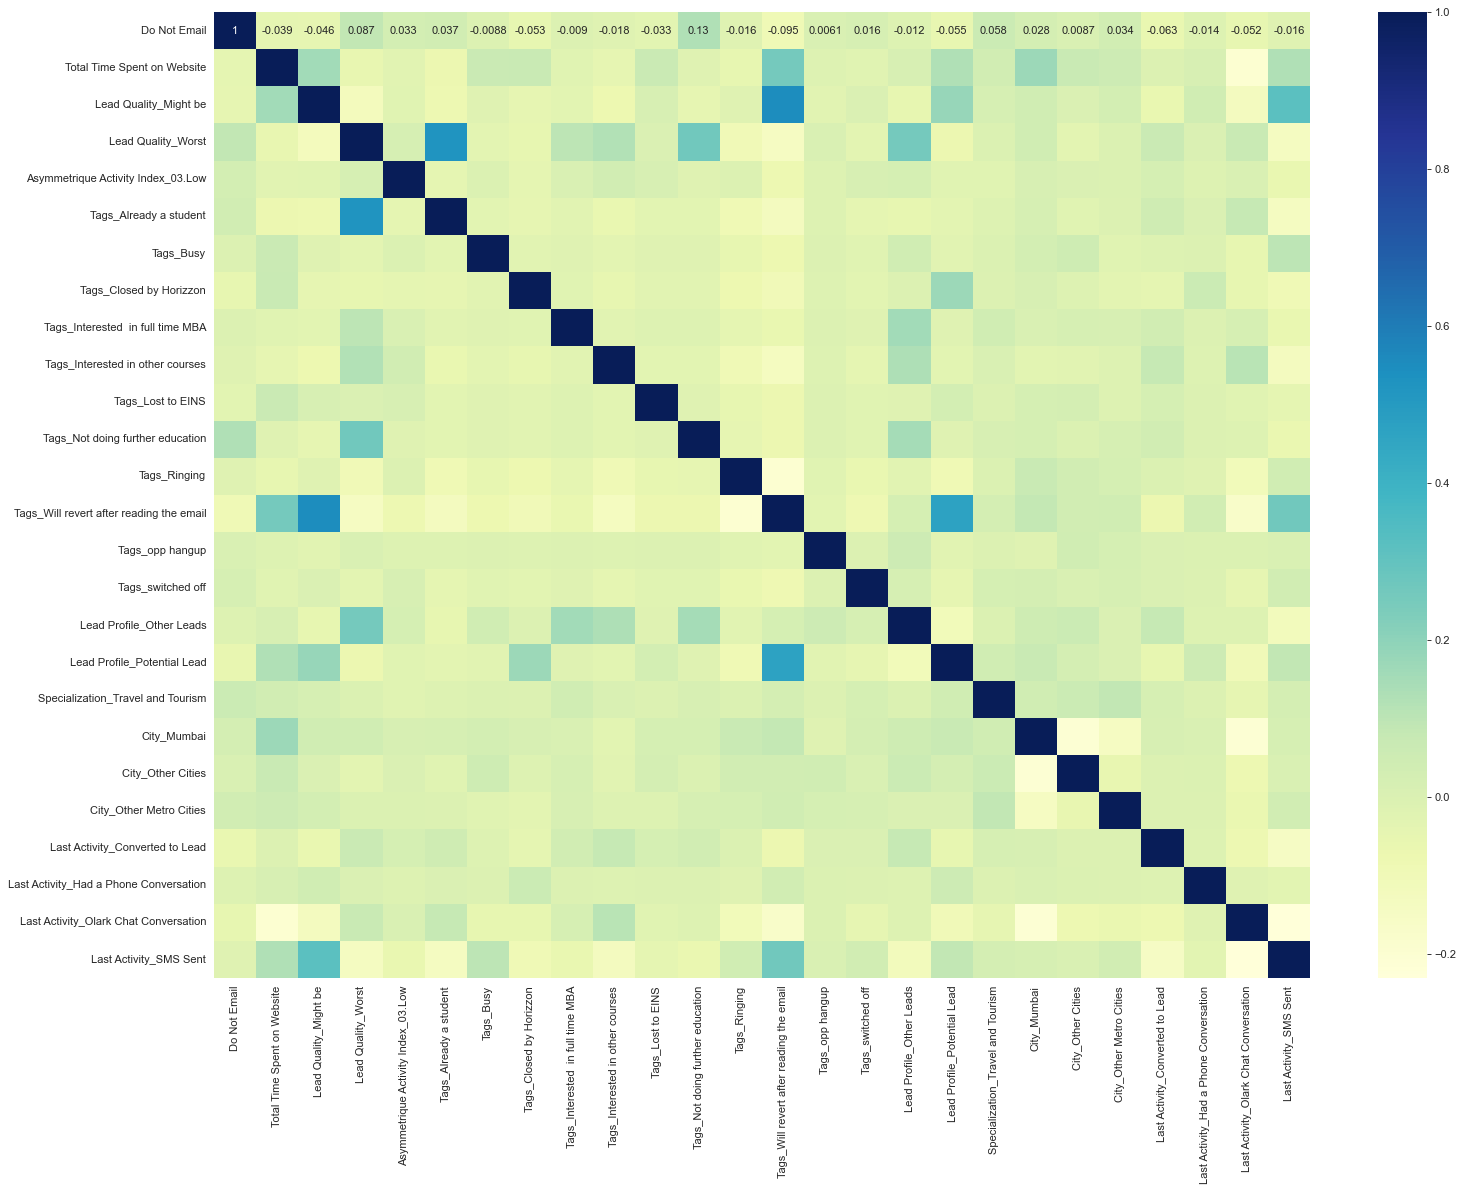

In [149]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

## <font color =maroon>Predicting a Train model</font>

In [136]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm.astype(float))
y_train_pred[:10]

8529    0.051402
7331    0.013337
7688    0.695436
92      0.072841
4908    0.040155
451     0.005064
4945    0.005103
2844    0.995680
4355    0.148984
7251    0.000275
dtype: float64

In [137]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.astype(float).values.reshape(-1)
y_train_pred[:10]

array([5.14015590e-02, 1.33365809e-02, 6.95435773e-01, 7.28409740e-02,
       4.01550301e-02, 5.06447339e-03, 5.10303535e-03, 9.95679943e-01,
       1.48984021e-01, 2.75434702e-04])

#### creating a dataframe with actual churn flag and predicted probabilities

In [138]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadNumber
0,0,0.051402,8529
1,0,0.013337,7331
2,1,0.695436,7688
3,0,0.072841,92
4,0,0.040155,4908


#### New column is created as 'Predicted' with 1 if Churn_Prob > 0.5 else 0

In [139]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadNumber,Predicted
0,0,0.051402,8529,0
1,0,0.013337,7331,0
2,1,0.695436,7688,1
3,0,0.072841,92,0
4,0,0.040155,4908,0


### Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [140]:
from sklearn import metrics

#### Confusion Metrics

In [141]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3527  209]
 [ 315 1951]]


In [142]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9126957680773076


In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8609885260370698

In [150]:
# Let calculate specificity
TN / float(TN+FP)

0.9440578158458244

In [151]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.05594218415417559


In [152]:
# positive predictive value 
print (TP / float(TP+FP))

0.9032407407407408


In [153]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9180114523685581


### <font color = maroon>PLOTTING ROC CURVE

An ROC curve demonstrates several things:
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [154]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [157]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

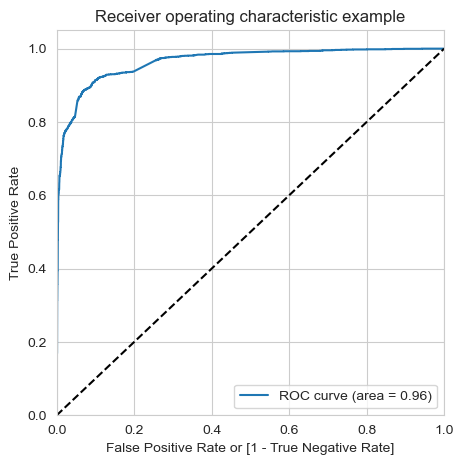

(array([0.        , 0.        , 0.        , ..., 0.99946467, 0.99973233,
        1.        ]),
 array([0.00000000e+00, 4.41306267e-04, 8.82612533e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99984792e+00, 9.99847918e-01, 9.99804983e-01, ...,
        6.27641388e-05, 5.38171080e-05, 4.35300928e-05]))

In [160]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Calculating the Area Under the Curve(GINI)

In [161]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [162]:
auc = auc_val(fpr,tpr)
auc

0.9649230619851094

## Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [165]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadNumber,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.051402,8529,0,1,0,0,0,0,0,0,0,0,0
1,0,0.013337,7331,0,1,0,0,0,0,0,0,0,0,0
2,1,0.695436,7688,1,1,1,1,1,1,1,1,0,0,0
3,0,0.072841,92,0,1,0,0,0,0,0,0,0,0,0
4,0,0.040155,4908,0,1,0,0,0,0,0,0,0,0,0


In [166]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377541  1.000000  0.000000
0.1   0.1  0.813729  0.976169  0.715203
0.2   0.2  0.886371  0.929832  0.860011
0.3   0.3  0.905365  0.913063  0.900696
0.4   0.4  0.913362  0.883936  0.931210
0.5   0.5  0.912696  0.860989  0.944058
0.6   0.6  0.900700  0.794793  0.964936
0.7   0.7  0.900533  0.770079  0.979657
0.8   0.8  0.889537  0.732127  0.985011
0.9   0.9  0.872043  0.678729  0.989293


### Now plotting accuracy sensitivity and specificity for various probabilities.

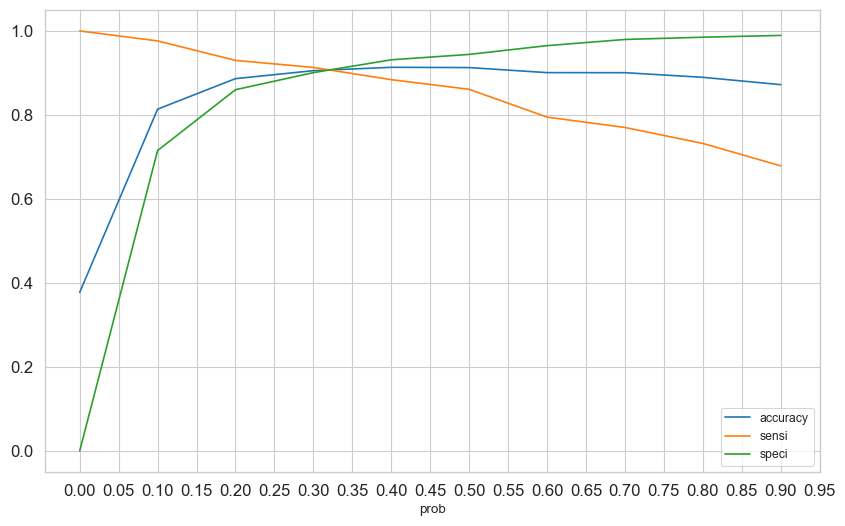

In [167]:
# Slightly alter the figure size to make it more horizontal.

#plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

#### From the curve aove, the cut off point is between 0.3 ~ 0.35 which comes around 0.33 as curtoff probability

In [168]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadNumber,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.051402,8529,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.013337,7331,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.695436,7688,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.072841,92,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.040155,4908,0,1,0,0,0,0,0,0,0,0,0,0


In [169]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9060313228923692

In [170]:
confusion_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion_1

array([[3405,  331],
       [ 233, 2033]])

In [172]:
TP = confusion_1[1,1] # true positive 
TN = confusion_1[0,0] # true negatives
FP = confusion_1[0,1] # false positives
FN = confusion_1[1,0] # false negatives

In [173]:
# see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8971756398940864

In [174]:
# specificity
TN / float(TN+FP)

0.9114025695931478

In [175]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08859743040685225


In [176]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8599830795262268


In [177]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9359538207806487


## Step 11: Precision and Recall

##### Precision
TP / TP + FP

In [178]:
precision = confusion_1[1,1]/(confusion_1[0,1]+confusion_1[1,1])
precision

0.8599830795262268

##### Recall
TP / TP + FN

In [179]:
recall = confusion_1[1,1]/(confusion_1[1,0]+confusion_1[1,1])
recall

0.8971756398940864

In [180]:
from sklearn.metrics import precision_score, recall_score

In [181]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8599830795262268

In [182]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8971756398940864

### Precision and recall tradeoff

In [183]:
from sklearn.metrics import precision_recall_curve

In [184]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5997    0
 5998    0
 5999    0
 6000    1
 6001    0
 Name: Converted, Length: 6002, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5997    0
 5998    0
 5999    0
 6000    1
 6001    0
 Name: final_predicted, Length: 6002, dtype: int64)

In [185]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

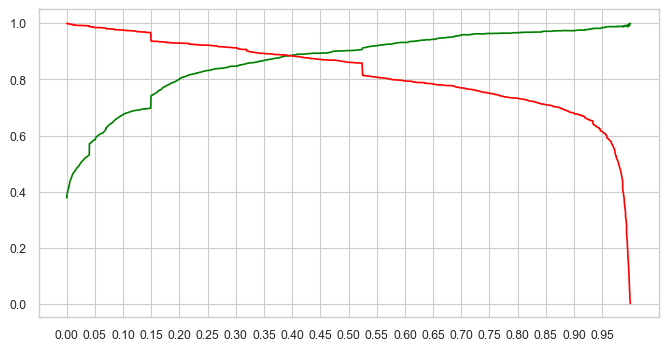

In [186]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

#### From the precision-recall graph above, we get the optical threshold value as close to 0.39. However our business requirement here is to have Lead Conversion Rate around 80%.  

#### This is already achieved with our earlier threshold value of 0.33. So we will stick to this value.

### Calculating the F1 score
##### F1 = 2×(Precision*Recall)/(Precision+Recall)

In [187]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8781857451403888

## Step 12: Making predictions on the test set

#### Here we are using the scaler function from the train dataset to apply on the test dataset

In [189]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
6190,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
7073,0,0,0.969969,-0.615211,1.785283,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4519,1,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
607,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
440,0,0,1.403911,-0.094170,0.562949,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [190]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Quality_Might be,Lead Quality_Worst,Asymmetrique Activity Index_03.Low,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,...,Lead Profile_Other Leads,Lead Profile_Potential Lead,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Metro Cities,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
6190,0,-0.872062,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7073,0,-0.615211,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4519,1,-0.872062,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
607,0,-0.872062,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
440,0,-0.094170,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Adding the constant

In [195]:
X_test_sm = sm.add_constant(X_test)

Prediction on the test set

In [198]:
X_test_sm = X_test_sm.astype(float)
y_test_pred = res.predict(X_test_sm)

In [199]:
y_test_pred[:10]

6190    0.000215
7073    0.172974
4519    0.069378
607     0.995530
440     0.230796
4247    0.084716
7431    0.013878
726     0.653798
7300    0.008924
4046    0.148984
dtype: float64

In [200]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)

In [201]:
y_pred_df.head()

,0
6190,0.000215
7073,0.172974
4519,0.069378
607,0.995530
440,0.230796


In [202]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [203]:
# getting leadID to index
y_test_df['Leadnumber'] = y_test_df.index

In [204]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [205]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [206]:
y_pred_final.head()

,Converted,Leadnumber,0
0,0,6190,0.000215
1,0,7073,0.172974
2,0,4519,0.069378
3,1,607,0.995530
4,0,440,0.230796


In [207]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [209]:
y_pred_final.head()

,Converted,Leadnumber,Conversion_Prob
0,0,6190,0.000215
1,0,7073,0.172974
2,0,4519,0.069378
3,1,607,0.995530
4,0,440,0.230796


In [211]:
# Rearranging the columns
y_pred_final = y_pred_final[['Leadnumber','Converted','Conversion_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))

In [212]:
y_pred_final.head()

,Leadnumber,Converted,Conversion_Prob,Lead_Score
0,6190,0,0.000215,0
1,7073,0,0.172974,17
2,4519,0,0.069378,7
3,607,1,0.995530,100
4,440,0,0.230796,23


In [213]:
y_pred_final.shape

(2573, 4)

#### Using the probability cutoff value 0f 0.33 on the test dataset to predict if a lead will convert

In [214]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [215]:
y_pred_final.head()

,Leadnumber,Converted,Conversion_Prob,Lead_Score,final_predicted
0,6190,0,0.000215,0,0
1,7073,0,0.172974,17,0
2,4519,0,0.069378,7,0
3,607,1,0.995530,100,1
4,440,0,0.230796,23,0


In [218]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

check_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
check_test_df['final_predicted'].value_counts()

final_predicted
1    902
0     94
Name: count, dtype: int64

In [220]:
# check the precentage of final_predicted conversions on test data
902/float(902+94)

0.9056224899598394

### <font color = maroon>Hence we can see that the final prediction of conversions have a target rate of 91% (which is same as predictions made on training data set)

<b><font color = green size =3>Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [216]:
# Let's check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.9106101826661485

In [227]:
confusion_2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_2)

[[1441  136]
 [  94  902]]


In [229]:
TP = confusion_2[1,1] #### true positive 
TN = confusion_2[0,0] #### true negatives
FP = confusion_2[0,1] #### false positives
FN = confusion_2[1,0] #### false negatives

In [230]:
# figure out the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9056224899598394

In [231]:
# specificity
TN / float(TN+FP)

0.9137603043753963

<b><font color = green size =3>Precision and Recall metrics for the test set

In [232]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.8689788053949904

In [233]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9056224899598394

- Inference:

After running the model on the Test Data these are the figures we obtain:

#### Accuracy : 91.06%
#### Sensitivity :90.56%
#### Specificity : 91.37%

## Step 13: Calculating Lead score of the entire dataset

### Lead Score = 100 * ConversionProbability

#### This needs to be calculated for all the leads from the original dataset (train + test)

In [237]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Leadnumber,Converted,Conversion_Prob,Lead_Score,final_predicted
0,6190,0,0.000215,0,0
1,7073,0,0.172974,17,0
2,4519,0,0.069378,7,0
3,607,1,0.995530,100,1
4,440,0,0.230796,23,0


In [238]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadNumber,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.051402,8529,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.013337,7331,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.695436,7688,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.072841,92,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.040155,4908,0,1,0,0,0,0,0,0,0,0,0,0


In [241]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadNumber','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadNumber,Converted,Conversion_Prob,final_predicted
0,8529,0,0.051402,0
1,7331,0,0.013337,0
2,7688,1,0.695436,1
3,92,0,0.072841,0
4,4908,0,0.040155,0


## Step 14: Determining Feature Importance

In [242]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                               -0.85
Total Time Spent on Website                 0.69
Lead Quality_Might be                      -0.45
Lead Quality_Worst                         -2.76
Asymmetrique Activity Index_03.Low         -2.01
Tags_Already a student                     -2.52
Tags_Busy                                   0.54
Tags_Closed by Horizzon                     6.25
Tags_Interested  in full time MBA          -1.77
Tags_Interested in other courses           -2.05
Tags_Lost to EINS                           6.68
Tags_Not doing further education           -2.29
Tags_Ringing                               -3.02
Tags_Will revert after reading the email    4.62
Tags_opp hangup                            -2.27
Tags_switched off                          -3.87
Lead Profile_Other Leads                    0.92
Lead Profile_Potential Lead                 0.69
Specialization_Travel and Tourism          -1.14
City_Mumbai                                -0.93
City_Other Cities   

#### Getting the relative coeffient value for all the attributes w.r.t the feature of the highest coefficient

In [243]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                               -12.78
Total Time Spent on Website                 10.36
Lead Quality_Might be                       -6.73
Lead Quality_Worst                         -41.23
Asymmetrique Activity Index_03.Low         -30.11
Tags_Already a student                     -37.65
Tags_Busy                                    8.10
Tags_Closed by Horizzon                     93.53
Tags_Interested  in full time MBA          -26.50
Tags_Interested in other courses           -30.60
Tags_Lost to EINS                          100.00
Tags_Not doing further education           -34.21
Tags_Ringing                               -45.14
Tags_Will revert after reading the email    69.14
Tags_opp hangup                            -34.04
Tags_switched off                          -57.92
Lead Profile_Other Leads                    13.77
Lead Profile_Potential Lead                 10.32
Specialization_Travel and Tourism          -17.11
City_Mumbai                                -13.91


In [244]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                15
Total Time Spent on Website                 12
Lead Quality_Might be                        3
Lead Quality_Worst                          23
Asymmetrique Activity Index_03.Low           5
Tags_Already a student                      11
Tags_Busy                                   14
Tags_Closed by Horizzon                      9
Tags_Interested  in full time MBA            4
Tags_Interested in other courses             8
Tags_Lost to EINS                           22
Tags_Not doing further education            24
Tags_Ringing                                21
Tags_Will revert after reading the email    18
Tags_opp hangup                             19
Tags_switched off                            0
Lead Profile_Other Leads                    20
Lead Profile_Potential Lead                  2
Specialization_Travel and Tourism            6
City_Mumbai                                 17
City_Other Cities                            1
City_Other Me

#### Plot showing the feature variables based on their relative coefficient values

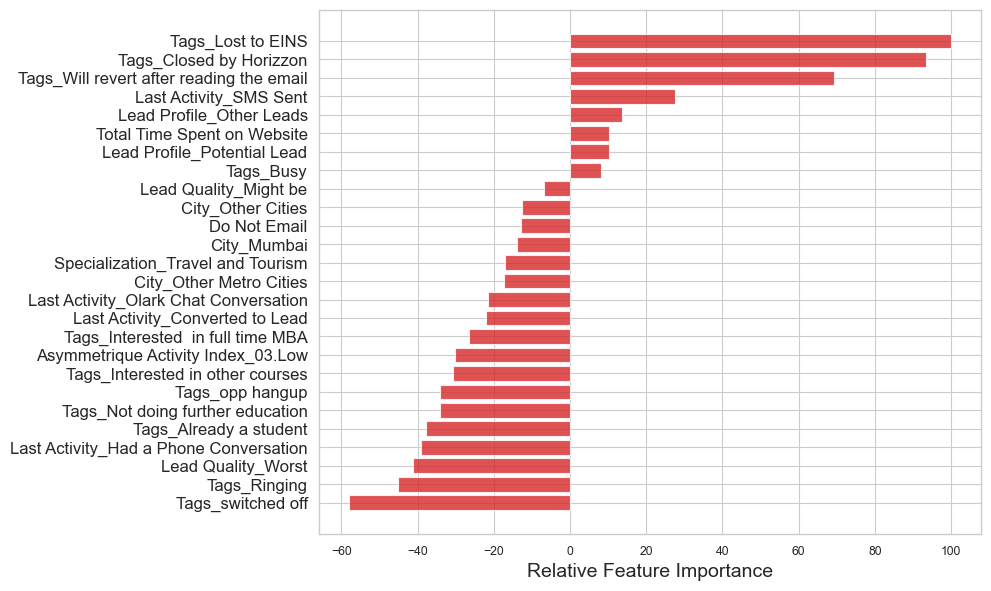

In [245]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Selecting `Top 3` features which contribute most towards the probability of a lead getting converted

In [246]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
10,Tags_Lost to EINS,100.00
7,Tags_Closed by Horizzon,93.53
13,Tags_Will revert after reading the email,69.14


### Step 15: Conclusion

- After trying several models, we finally chose a model with the following characteristics: 
- All variables have p-value < 0.05.
- All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. - This is also evident from the heat map.
- The overall accuracy of 91.06% at a probability threshold of 0.33 on the test dataset is also very acceptable.

The important features responsible for a good conversion rate or the ones that contribute more towards the probability of a lead getting converted are:

1. Tags_Lost to EINS	100.00

2. Tags_Closed by Horizzon	93.53

3. Tags_Will revert after reading the email	69.14